In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import csv
import os 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
master_df = pd.read_csv("PPP_Agg.csv")
master_df["ZIP"] = master_df["ZIP"].astype(str).str.zfill(5)
master_df.set_index("ZIP", inplace=True)

In [4]:
# rural_df = pd.read_csv("Rural.csv")
# rural_df["ZIP"] = rural_df["GEOCODE"].astype(str).str.zfill(5)
# rural_df.set_index("ZIP", inplace=True)
# rural_df

In [5]:
# master_df["Rural"] = rural_df["Percent Rural"]
# master_df

In [6]:
stats_df = master_df[~master_df["Min Share"].isnull()][["Min Share",
                                                       "Min Share Excl B",
                                                       "Black Share",
                                                       "White Share",
                                                       "Asian Share",
                                                       "Hisp Share",
                                                       "Native Share",
                                                       'Rural', 
                                                       'PC Inc', 
                                                       'Gini',
                                                       'UR', 
                                                       '%BachOrMore',
                                                       "W_Avg Emp Min Share",
                                                       "W_Avg Emp Black Share",
                                                       "W_Avg Emp White Share",
                                                       "W_Avg Emp Asian Share",
                                                       "W_Avg Emp Hisp Share",
                                                       "W_Avg Emp Non-Hisp Share",
                                                       "W_Avg Emp Min Share",
                                                       "W_Avg Emp Min Share",
                                                       "Total Pop",
                                                       "Loans per Emp Bus",
                                                       "Avg Loan Amt per Emp",
                                                       "Loans per Emp Bus_1",
                                                       "Avg Loan Amt per Emp_1",
                                                       "Loans per Emp Bus_2",
                                                       "Avg Loan Amt per Emp_2",
                                                       "Loans per Emp Bus_3",
                                                       "Avg Loan Amt per Emp_3"]]

In [7]:
# excluded_prefixes = ('962',
# '963',
# '964',
# '965',
# '966',
# '090',
# '091',
# '092',
# '093',
# '094',
# '095',
# '096',
# '097',
# '098',
# '006',
# '007',
# '008',
# '009')

# stats_df = stats_df[~stats_df.index.str.startswith(excluded_prefixes)]
# stats_df

In [8]:
stats_df["Avg Loan Amt per Emp_2 Adj"] = stats_df["Avg Loan Amt per Emp_2"] * 349 / 320
stats_df["Avg Loan Amt per Emp_3 Adj"] = stats_df["Avg Loan Amt per Emp_3"] * 349 / 284.5

In [9]:
region_mappings = {
    '9': 'West',
    '8': 'West',
    '59': 'West',
    '7': 'South',
    '885': 'South',
    '3': 'South',
    '40': 'South',
    '41': 'South',
    '42': 'South',
    '2': 'South',
    '197': 'South',
    '198': 'South',
    '199': 'South',
    '569': 'South',
    '5': 'Midwest',
    '6': 'Midwest',
    '4': 'Midwest',
    '0': 'Northeast',
    '1': 'Northeast',
}

# Define a function to map ZIP code to region based on the first few digits
def map_zip_to_region(zip_code):
    for i in range(len(zip_code), 0, -1):
        prefix = zip_code[:i]
        if prefix in region_mappings:
            return region_mappings[prefix]
    return None  # Return None if no match is found

# Apply the function to each ZIP code in the DataFrame index and create a new column
stats_df['Census Region'] = stats_df.index.map(map_zip_to_region)

In [10]:
def plot_binned_means(df, x_col, y_col, weight_col):
    # Drop NaN values for relevant columns
    df = df.dropna(subset=[x_col, y_col, weight_col])

    # Create bins for the x column
    df[f'{x_col} Bin'] = pd.cut(df[x_col], bins=20)

    # Initialize figure
    plt.figure(figsize=(14, 6))

    # Calculate and plot the unweighted mean for the y-column
    plt.subplot(1, 2, 2)
    grouped_unweighted = df.groupby(f'{x_col} Bin')[y_col].mean().reset_index()
    plt.bar(grouped_unweighted[f'{x_col} Bin'].astype(str), grouped_unweighted[y_col])
    plt.xticks(rotation=45)
    plt.xlabel(x_col)
    plt.ylabel(f'Mean {y_col}')
    plt.title(f'Unweighted Mean {y_col} for each {x_col} Bin')

    # Calculate and plot the weighted mean for the y-column
    plt.subplot(1, 2, 1)
    df['Weighted'] = df[y_col] * df[weight_col]
    grouped_weighted = df.groupby(f'{x_col} Bin').apply(lambda x: x['Weighted'].sum() / x[weight_col].sum()).reset_index(name=f'Weighted Mean {y_col}')
    plt.bar(grouped_weighted[f'{x_col} Bin'].astype(str), grouped_weighted[f'Weighted Mean {y_col}'])
    plt.xticks(rotation=45)
    plt.xlabel(x_col)
    plt.ylabel(f'Weighted Mean {y_col}')
    plt.title(f'Weighted Mean {y_col} for each {x_col} Bin')

    plt.tight_layout()
    plt.show()

PPP Loans

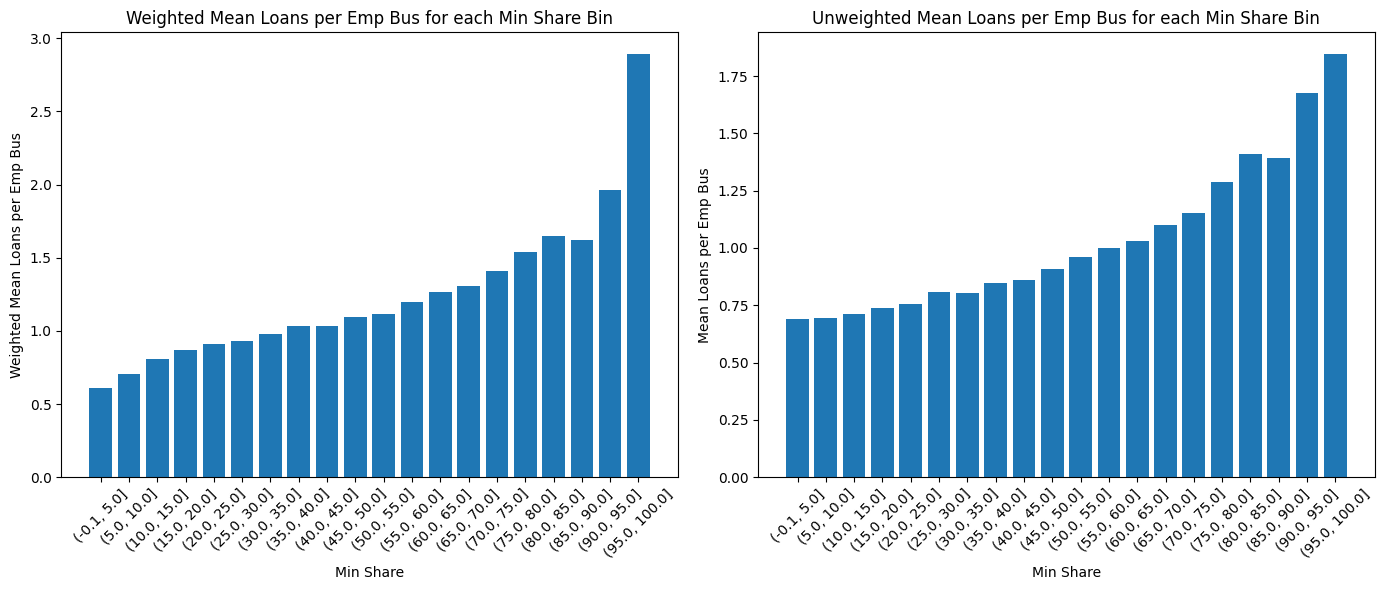

In [11]:
plot_binned_means(stats_df, "Min Share", "Loans per Emp Bus", "Total Pop")

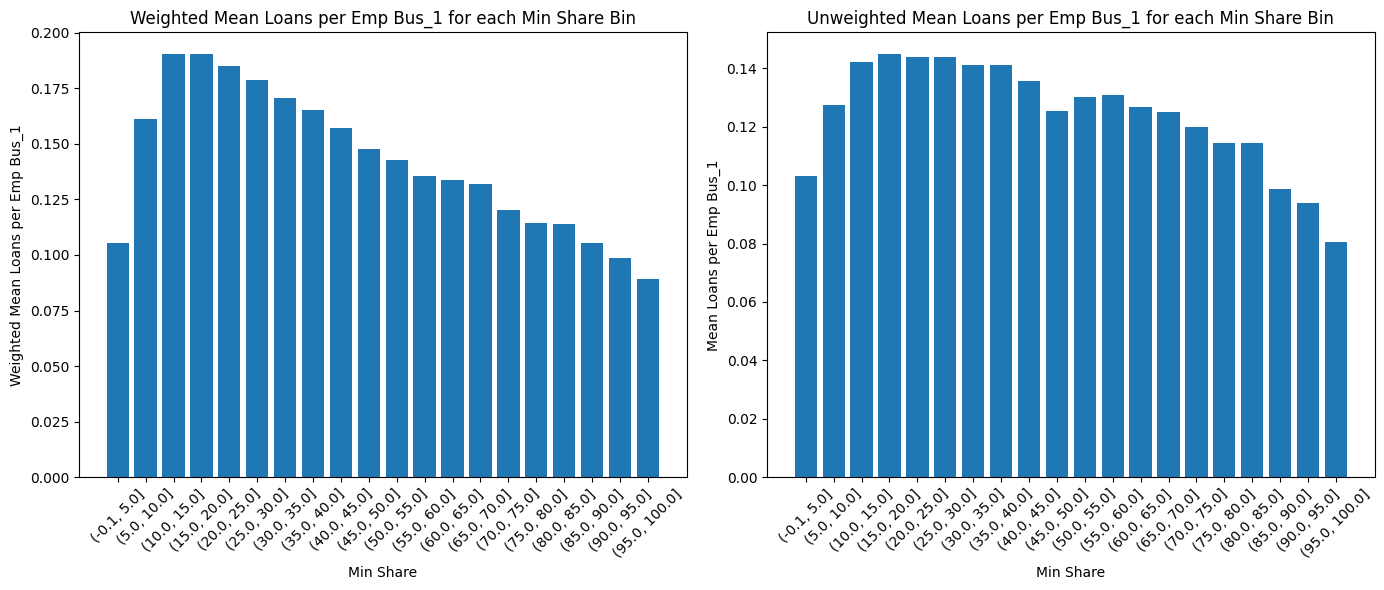

In [12]:
plot_binned_means(stats_df, "Min Share", "Loans per Emp Bus_1", "Total Pop")

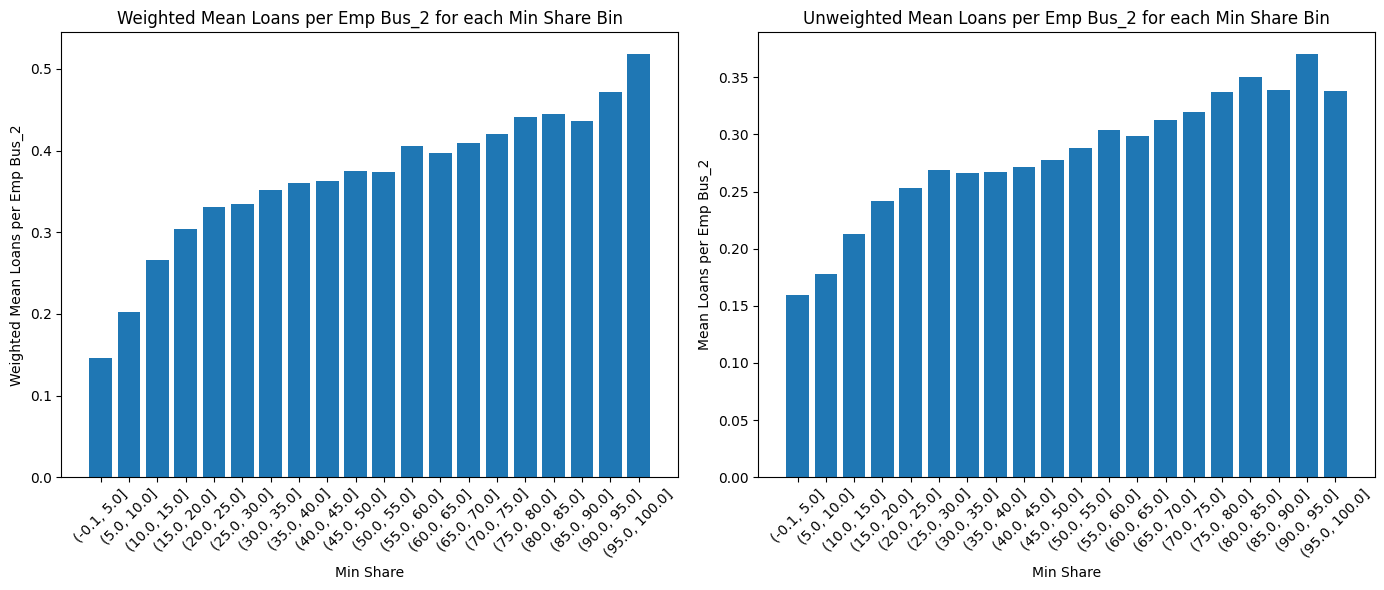

In [13]:
plot_binned_means(stats_df, "Min Share", "Loans per Emp Bus_2", "Total Pop")

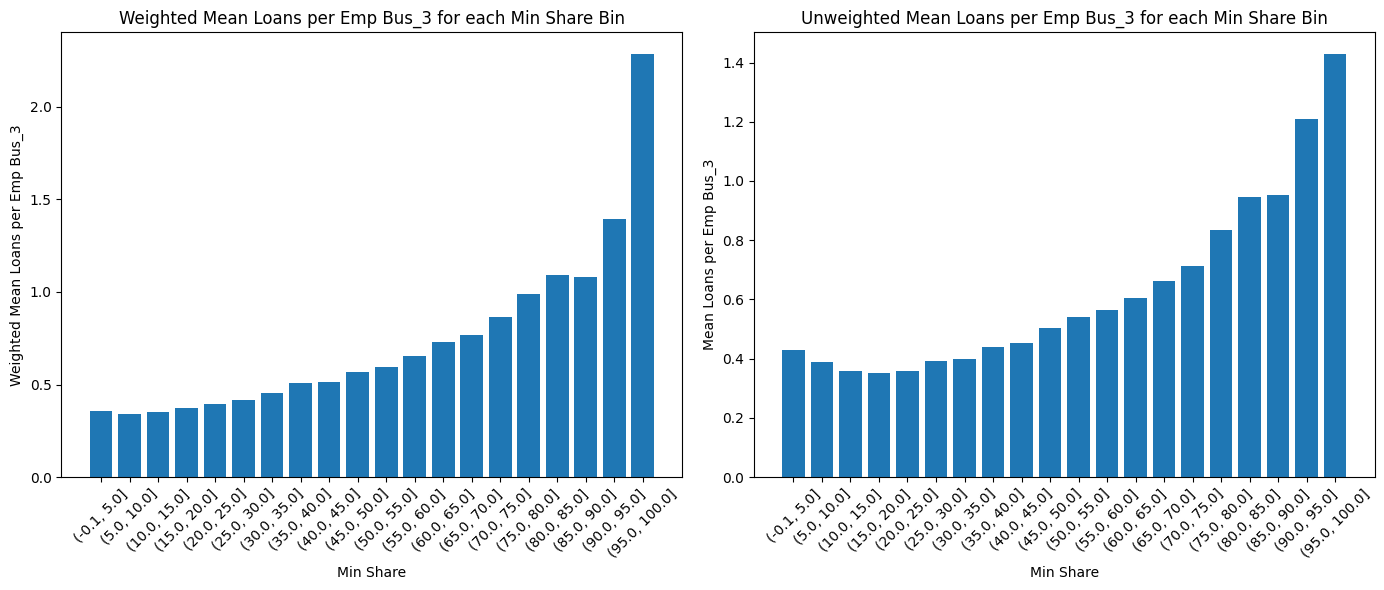

In [14]:
plot_binned_means(stats_df, "Min Share", "Loans per Emp Bus_3", "Total Pop")

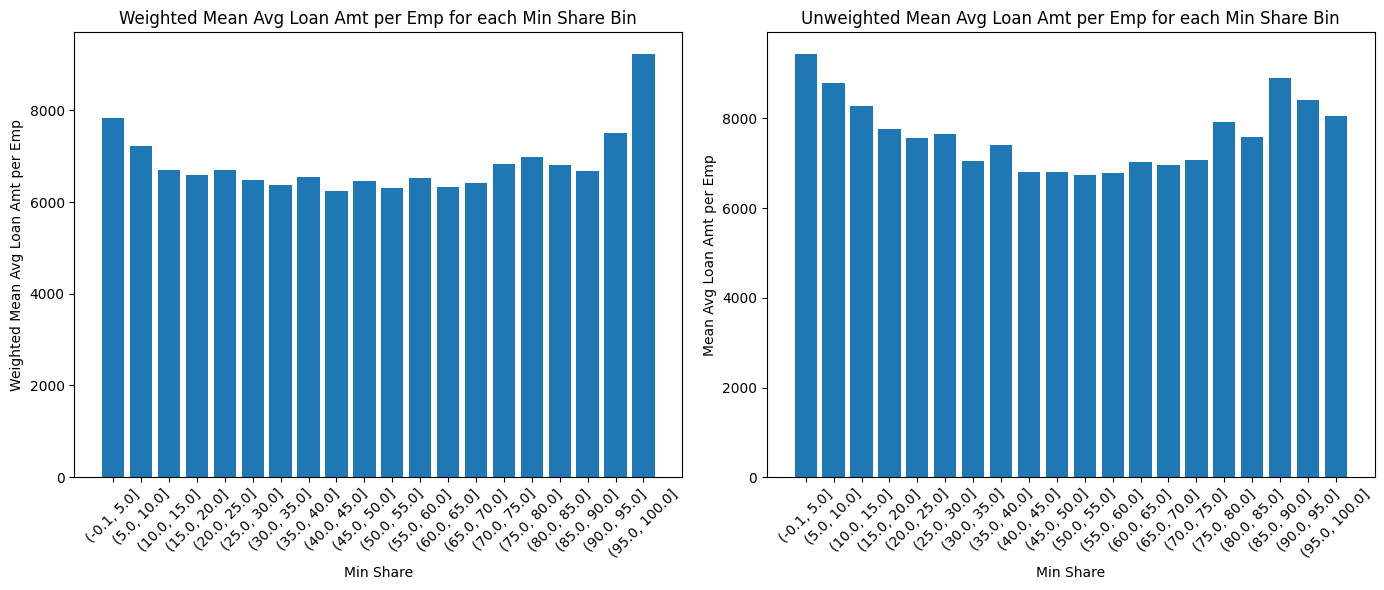

In [15]:
plot_binned_means(stats_df, "Min Share", "Avg Loan Amt per Emp", "Total Pop")

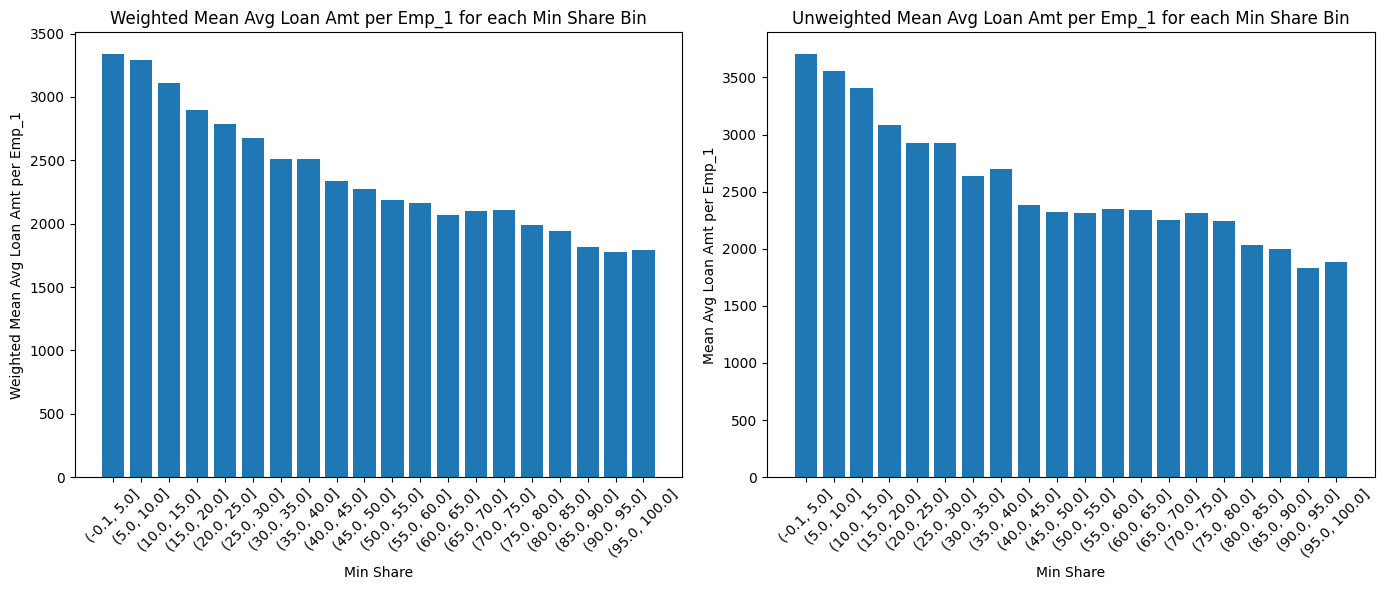

In [16]:
plot_binned_means(stats_df, "Min Share", "Avg Loan Amt per Emp_1", "Total Pop")

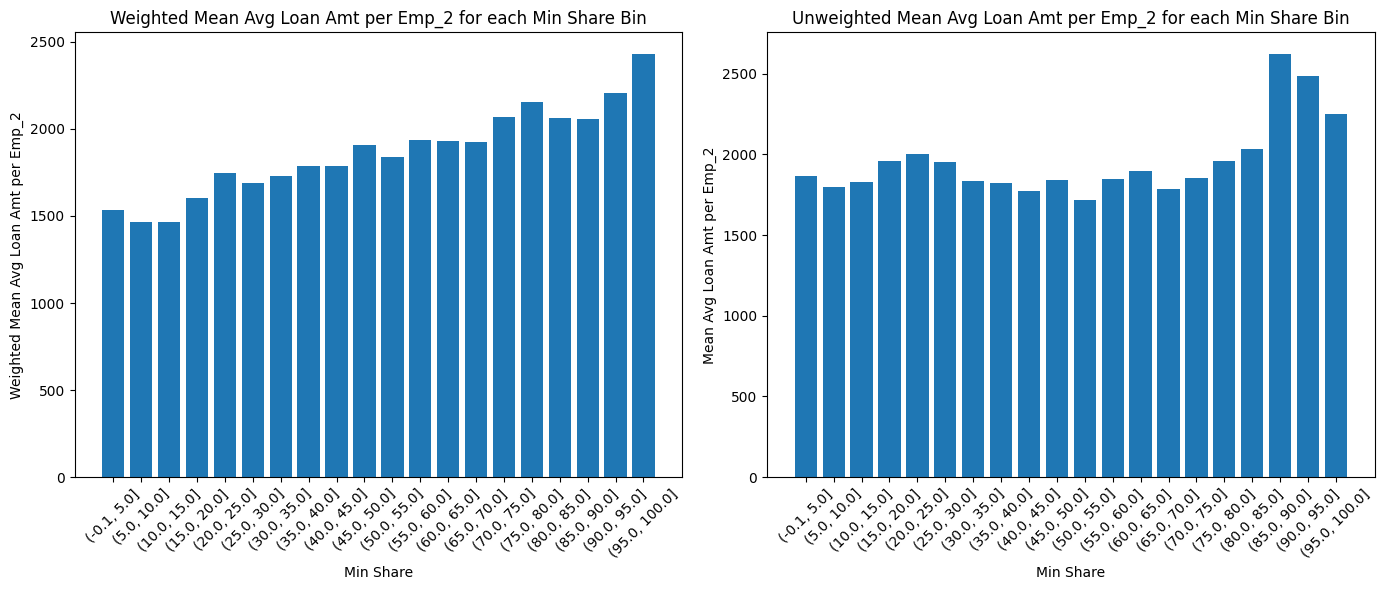

In [17]:
plot_binned_means(stats_df, "Min Share", "Avg Loan Amt per Emp_2", "Total Pop")

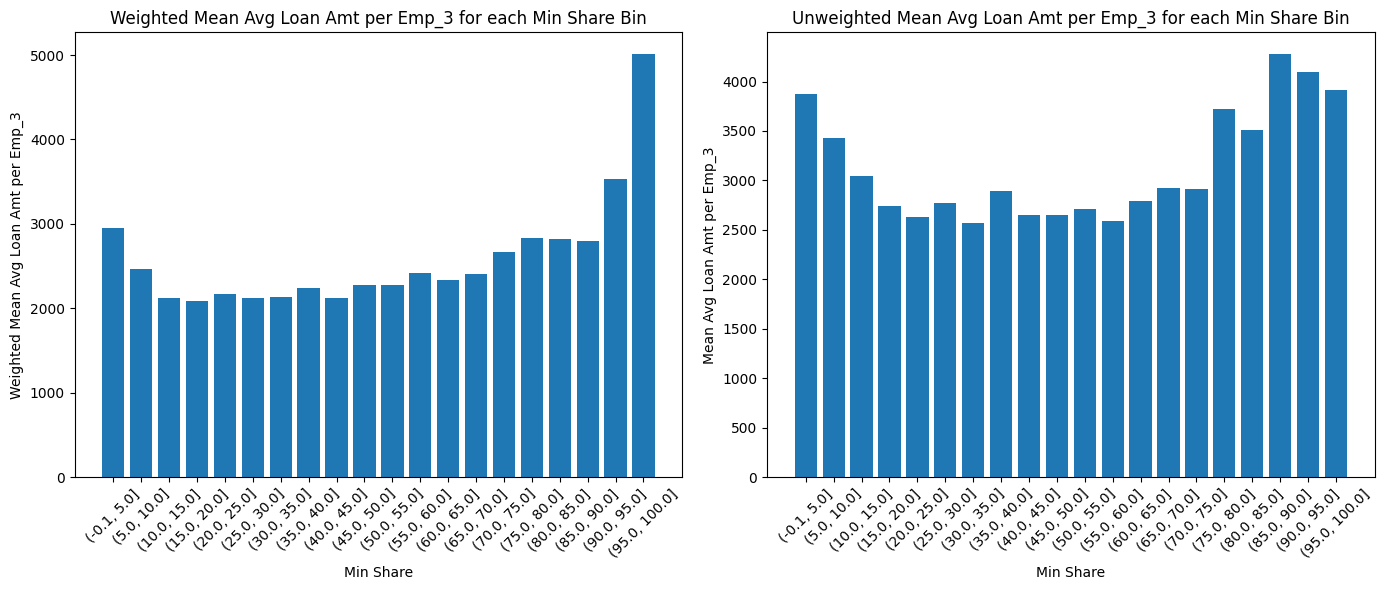

In [18]:
plot_binned_means(stats_df, "Min Share", "Avg Loan Amt per Emp_3", "Total Pop")

Race breakdowns

In [19]:
def plot_multi_binned_means(df, x_cols, y_col, weight_col):
    # Create a copy of the DataFrame to avoid modifying the original DataFrame
    df = df.copy()
    
    # Drop NaN values for relevant columns
    cols_to_check = x_cols + [y_col, weight_col]
    df.dropna(subset=cols_to_check, inplace=True)
    
    # Initialize the figure
    plt.figure(figsize=(14, 6))
    
    # Loop for Unweighted and Weighted
    for i, calc_type in enumerate(['Unweighted', 'Weighted']):
        
        plt.subplot(1, 2, i + 1)
        
        for x_col in x_cols:
            # Create bins for the x column
            bin_label = f'{x_col} Bin'
            df[bin_label] = pd.cut(df[x_col], bins=20)
            
            if calc_type == 'Weighted':
                # Calculate weighted mean for each bin
                df['Weighted'] = df[y_col] * df[weight_col]
                grouped = df.groupby(bin_label).apply(lambda x: x['Weighted'].sum() / x[weight_col].sum()).reset_index(name=f'Weighted Mean {y_col}')
            else:
                # Calculate unweighted mean for each bin
                grouped = df.groupby(bin_label)[y_col].mean().reset_index()
            
            plt.plot(grouped[bin_label].astype(str), grouped[grouped.columns[-1]], label=f'{x_col} ({calc_type})')
            
        plt.xticks(rotation=45)
        plt.xlabel('Bins')
        plt.ylabel(f'{calc_type} Mean {y_col}')
        plt.title(f'{calc_type} Mean {y_col} for Multiple X Variables')
        plt.legend()

    plt.tight_layout()
    plt.show()


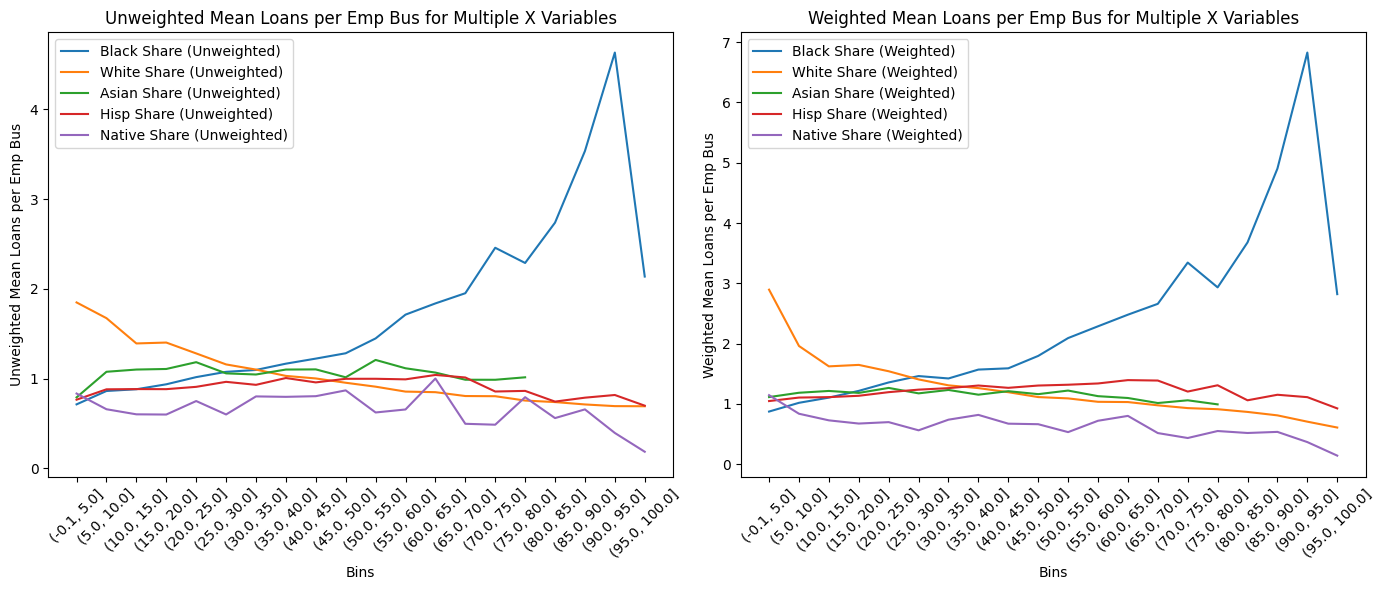

In [20]:
plot_multi_binned_means(stats_df, ["Black Share",
                             "White Share",
                             "Asian Share",
                             "Hisp Share",
                             "Native Share"], "Loans per Emp Bus", "Total Pop")

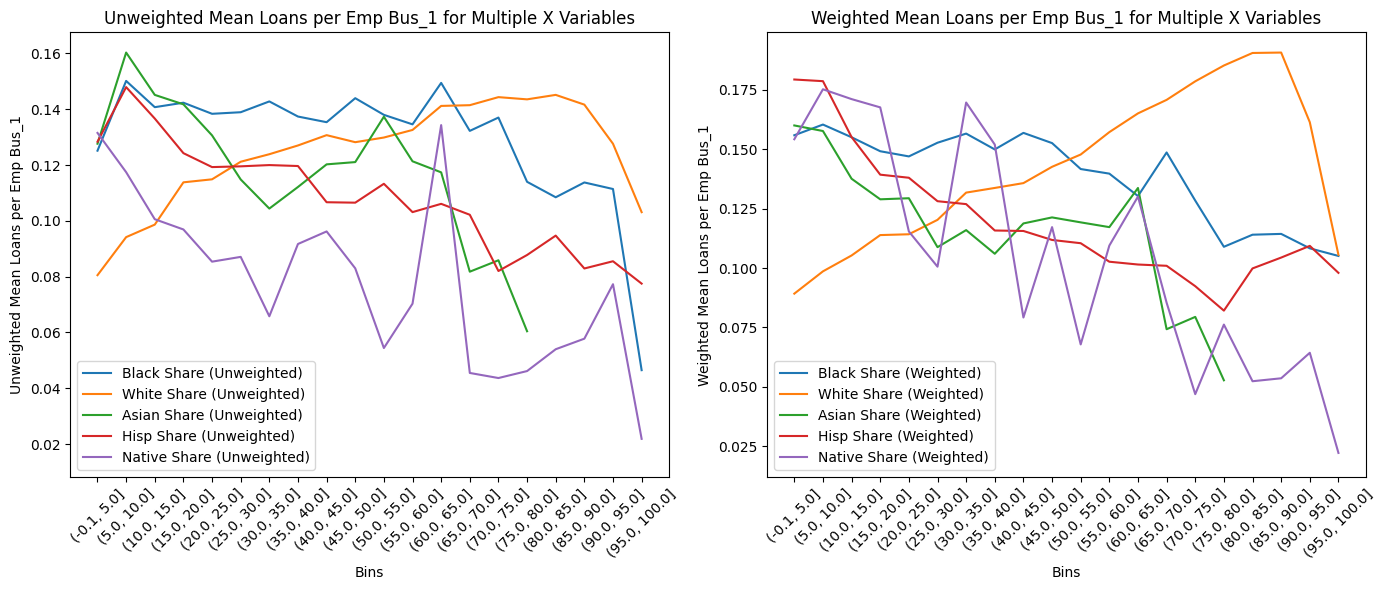

In [21]:
plot_multi_binned_means(stats_df, ["Black Share",
                             "White Share",
                             "Asian Share",
                             "Hisp Share",
                             "Native Share"], "Loans per Emp Bus_1", "Total Pop")

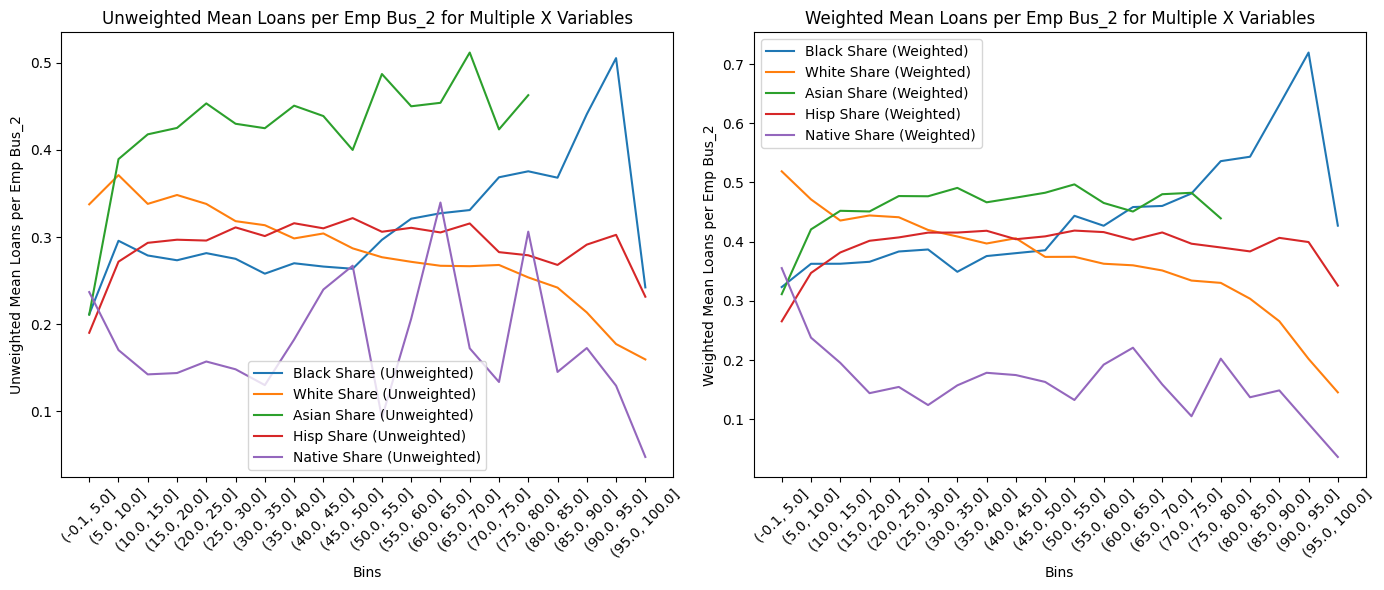

In [22]:
plot_multi_binned_means(stats_df, ["Black Share",
                             "White Share",
                             "Asian Share",
                             "Hisp Share",
                             "Native Share"], "Loans per Emp Bus_2", "Total Pop")

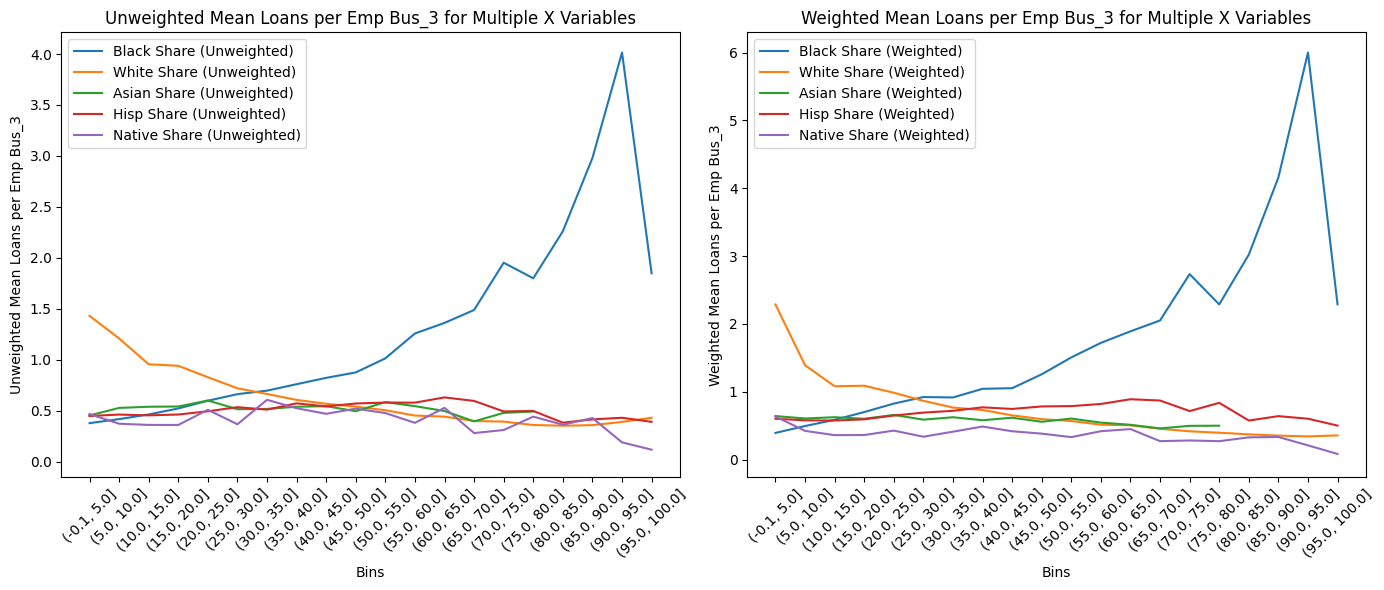

In [23]:
plot_multi_binned_means(stats_df, ["Black Share",
                             "White Share",
                             "Asian Share",
                             "Hisp Share",
                             "Native Share"], "Loans per Emp Bus_3", "Total Pop")

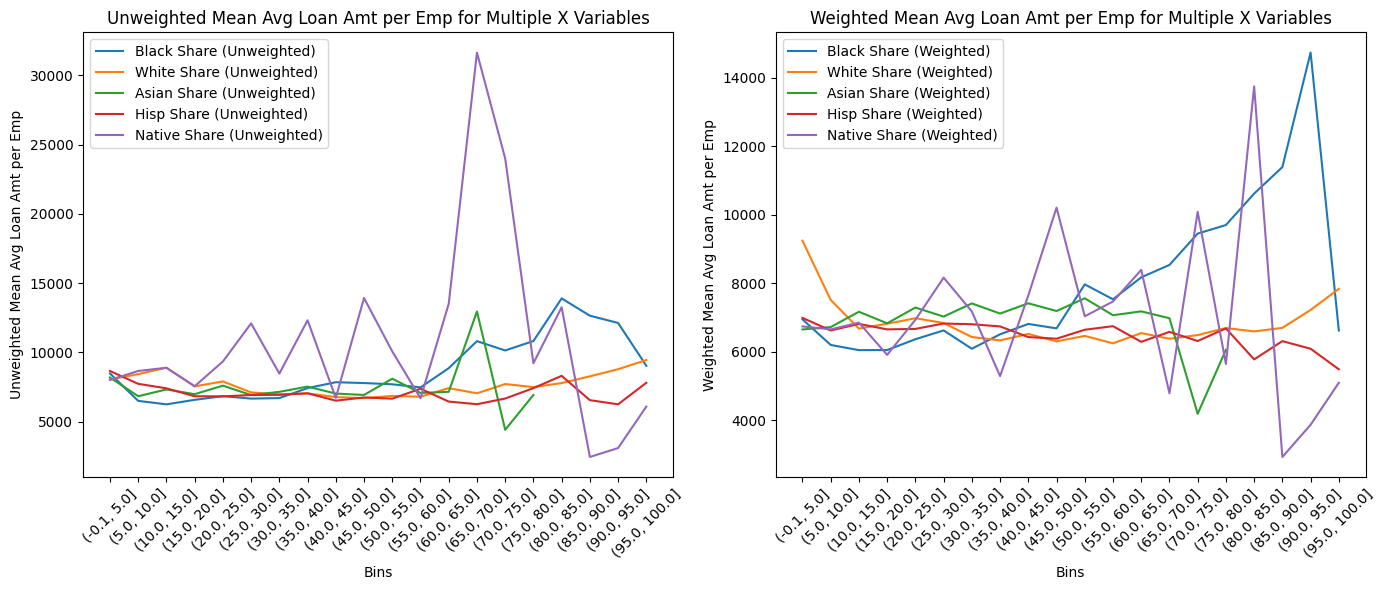

In [24]:
plot_multi_binned_means(stats_df, ["Black Share",
                             "White Share",
                             "Asian Share",
                             "Hisp Share",
                             "Native Share"], "Avg Loan Amt per Emp", "Total Pop")

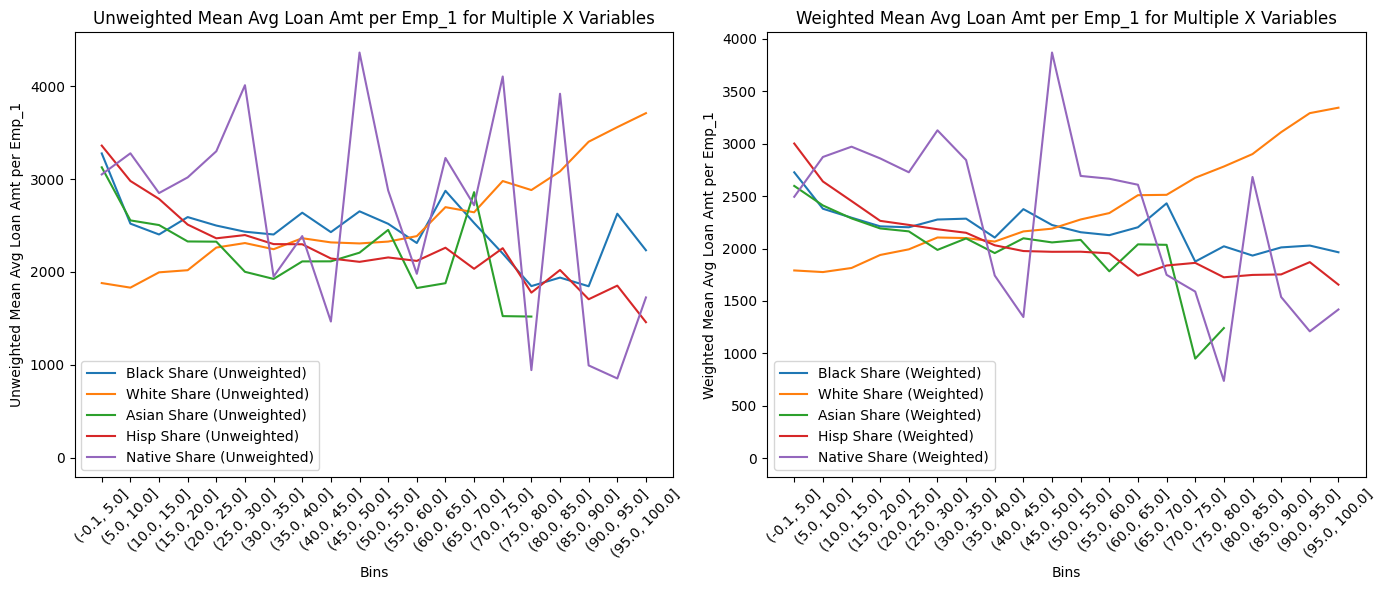

In [25]:
plot_multi_binned_means(stats_df, ["Black Share",
                             "White Share",
                             "Asian Share",
                             "Hisp Share",
                             "Native Share"], "Avg Loan Amt per Emp_1", "Total Pop")

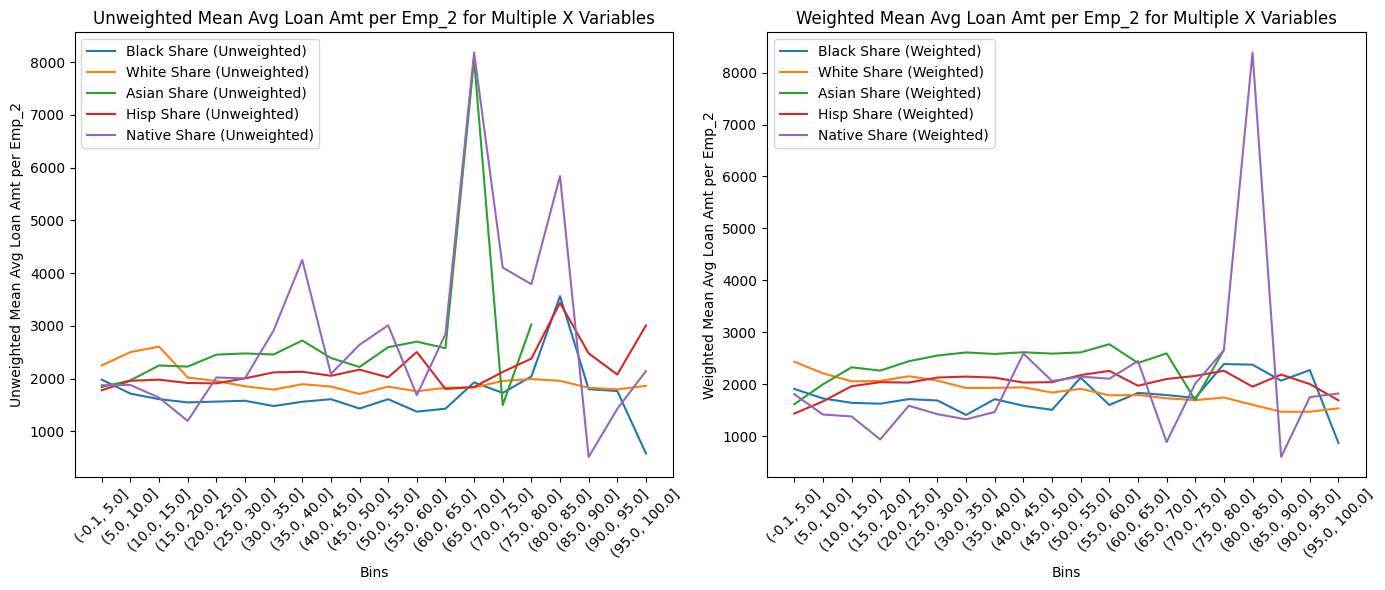

In [26]:
plot_multi_binned_means(stats_df, ["Black Share",
                             "White Share",
                             "Asian Share",
                             "Hisp Share",
                             "Native Share"], "Avg Loan Amt per Emp_2", "Total Pop")

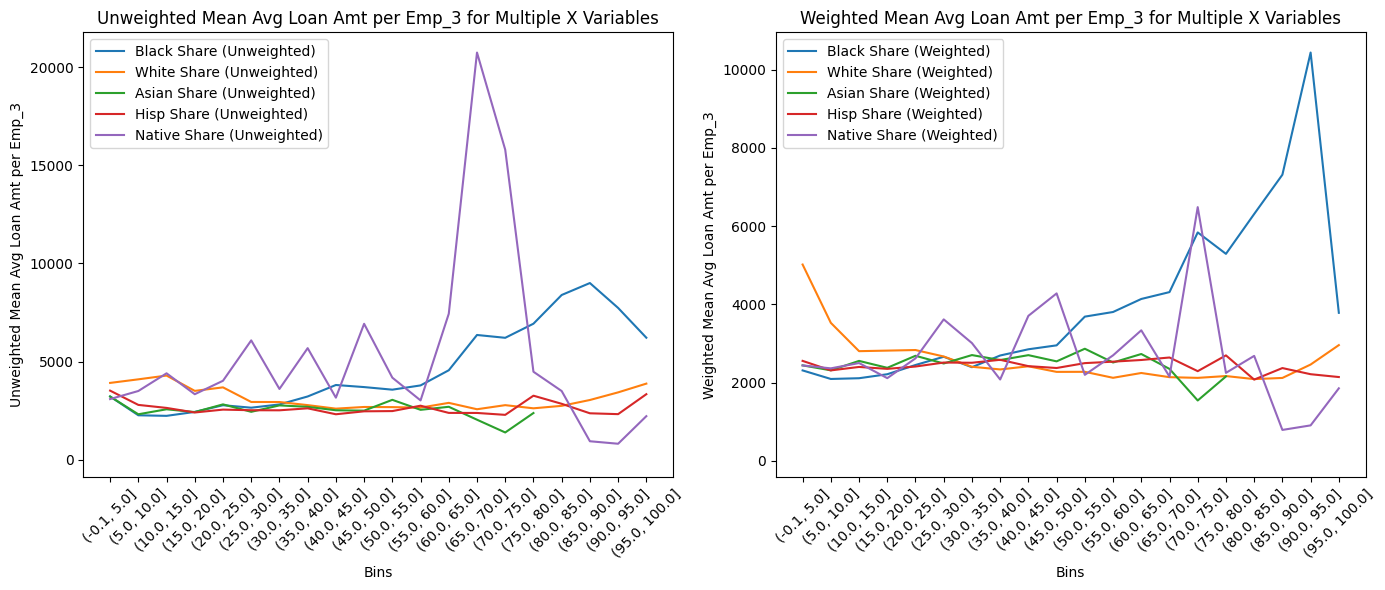

In [27]:
plot_multi_binned_means(stats_df, ["Black Share",
                             "White Share",
                             "Asian Share",
                             "Hisp Share",
                             "Native Share"], "Avg Loan Amt per Emp_3", "Total Pop")

All Three Together

In [28]:
def plot_multi_binned_means(df, x_col, y_cols, weight_col, color_col, y_limits=None):
    # Initialize the figure
    n = len(y_cols)
    fig, axes = plt.subplots(2, n, figsize=(n * 6, 12))
    
    # Drop NaN values for relevant columns
    df = df.dropna(subset=[x_col] + y_cols + [weight_col, color_col])
    
    for i, y_col in enumerate(y_cols):
        for j, measure in enumerate(['Unweighted', 'Weighted']):
            ax = axes[j, i]
            title  = f'Mean {y_col}'
            
            # Create bins for the x column
            bin_label = f'{x_col} Bin'
            df[bin_label] = pd.cut(df[x_col], bins=20)
            
            if measure == 'Weighted':
                # Calculate weighted mean for each bin
                df['Weighted'] = df[y_col] * df[weight_col]
                grouped = df.groupby(bin_label).apply(lambda x: x['Weighted'].sum() / x[weight_col].sum()).reset_index(name=f'Weighted Mean {y_col}')
                title += f" Weighted by {weight_col}"
            else:
                # Calculate unweighted mean for each bin
                grouped = df.groupby(bin_label)[y_col].mean().reset_index()
            
            # Calculate the weighted average of the color column for each bin
            df['WeightedColor'] = df[color_col] * df[weight_col]
            color_grouped = df.groupby(bin_label).apply(lambda x: x['WeightedColor'].sum() / x[weight_col].sum()).reset_index(name=f'Weighted {color_col}')
            
            # Using ax.bar to create bar charts with normalized colors
            cmap = sns.color_palette("coolwarm", as_cmap=True)
            normed_color = (color_grouped[f'Weighted {color_col}'] - color_grouped[f'Weighted {color_col}'].min()) / (color_grouped[f'Weighted {color_col}'].max() - color_grouped[f'Weighted {color_col}'].min())
            ax.bar(grouped[bin_label].astype(str), grouped[grouped.columns[-1]], color=cmap(normed_color), label=f'{x_col} ({measure})')
            
            # Perform quadratic regression
            x_data = np.arange(len(grouped[bin_label]))
            y_data = grouped[grouped.columns[-1]].values
            coeffs = np.polyfit(x_data, y_data, 2)
            poly_eq = np.poly1d(coeffs)
            x_poly = np.linspace(min(x_data), max(x_data), 100)
            y_poly = poly_eq(x_poly)
            ax.plot(x_poly, y_poly, 'r-', label='Quadratic Fit')
            
            ax.set_xticks(x_data)
            ax.set_xticklabels(grouped[bin_label].astype(str), rotation=45)
            title += f' by {x_col}'
            ax.set_title(title)
            
            if y_limits:
                # Setting different y-limits for unweighted and weighted rows
                ax.set_ylim(y_limits[j])
                
            ax.legend()
    
    plt.tight_layout()
    plt.show()

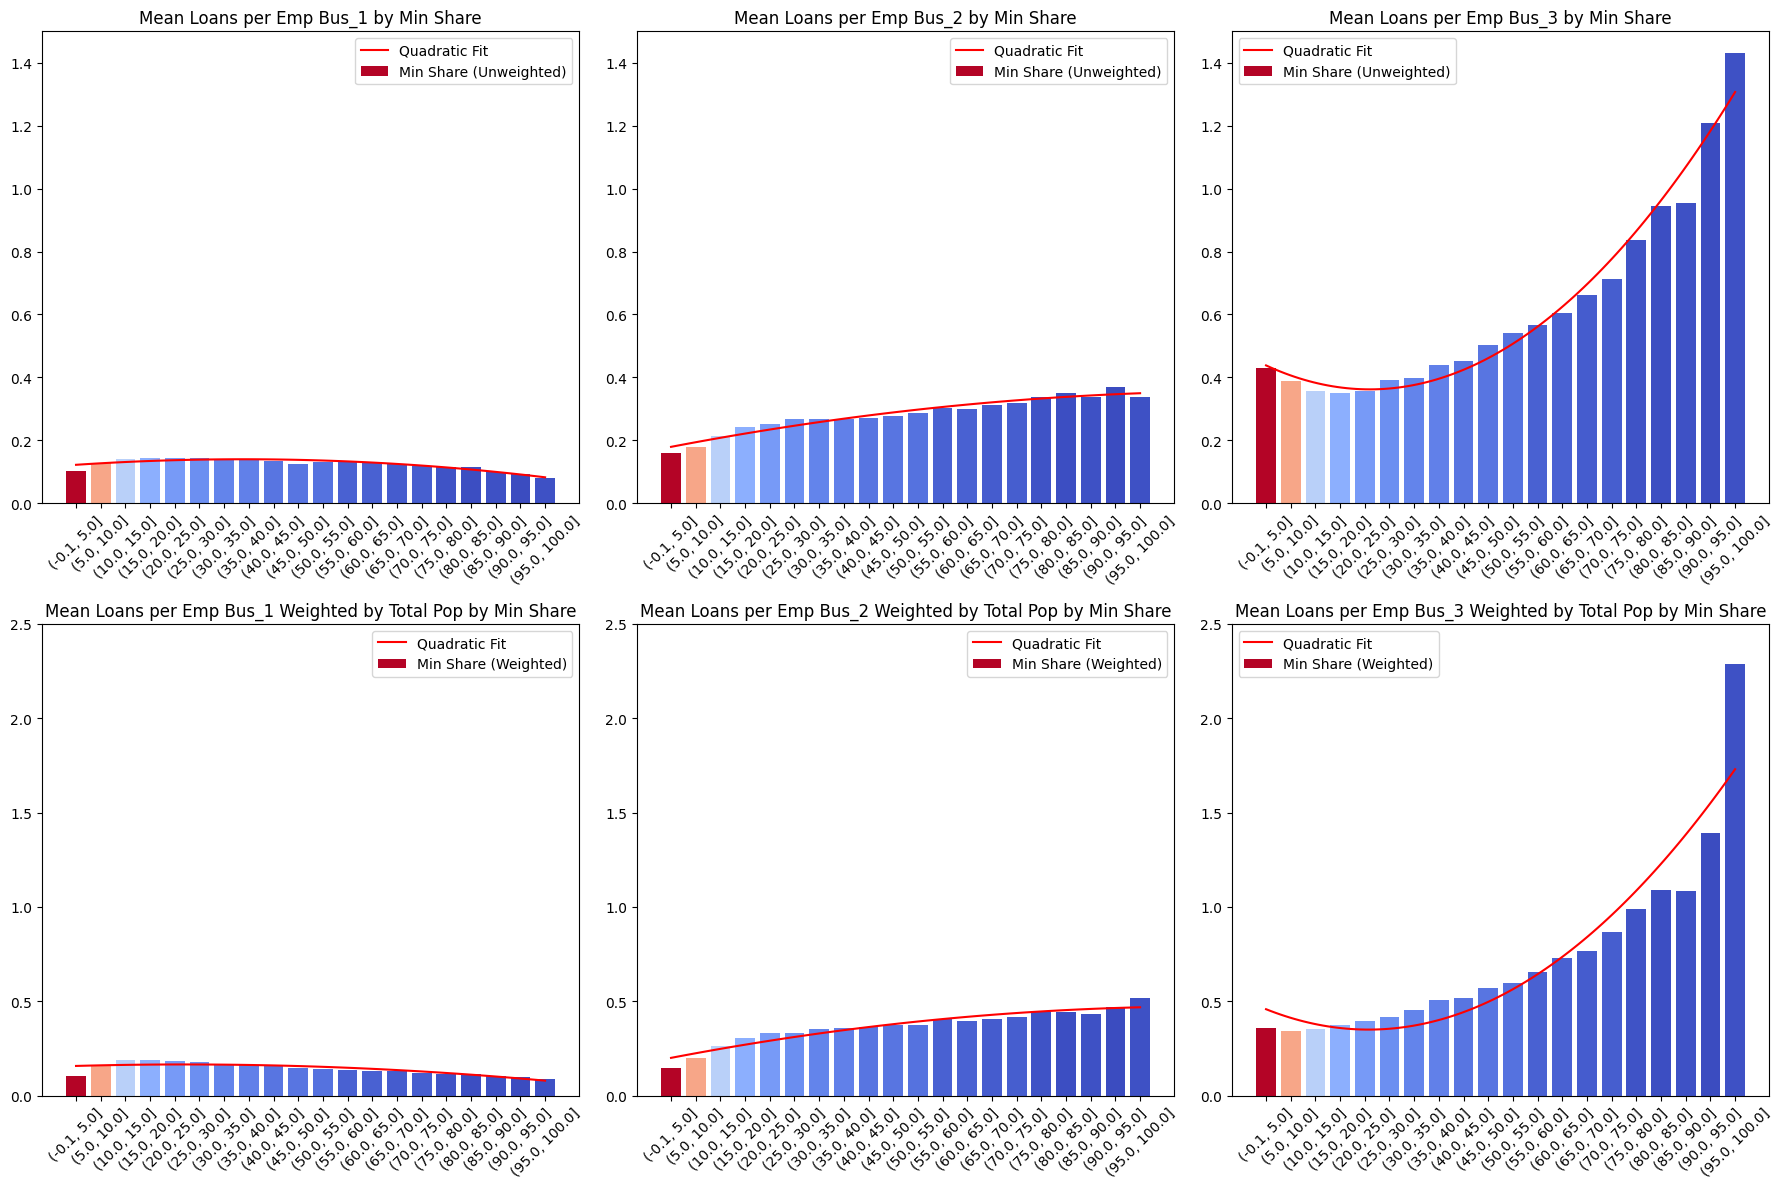

In [29]:
plot_multi_binned_means(stats_df, 'Min Share', ["Loans per Emp Bus_1", 
              "Loans per Emp Bus_2",
              "Loans per Emp Bus_3"], 'Total Pop', "Rural", y_limits=[[0,1.5],[0,2.5]])

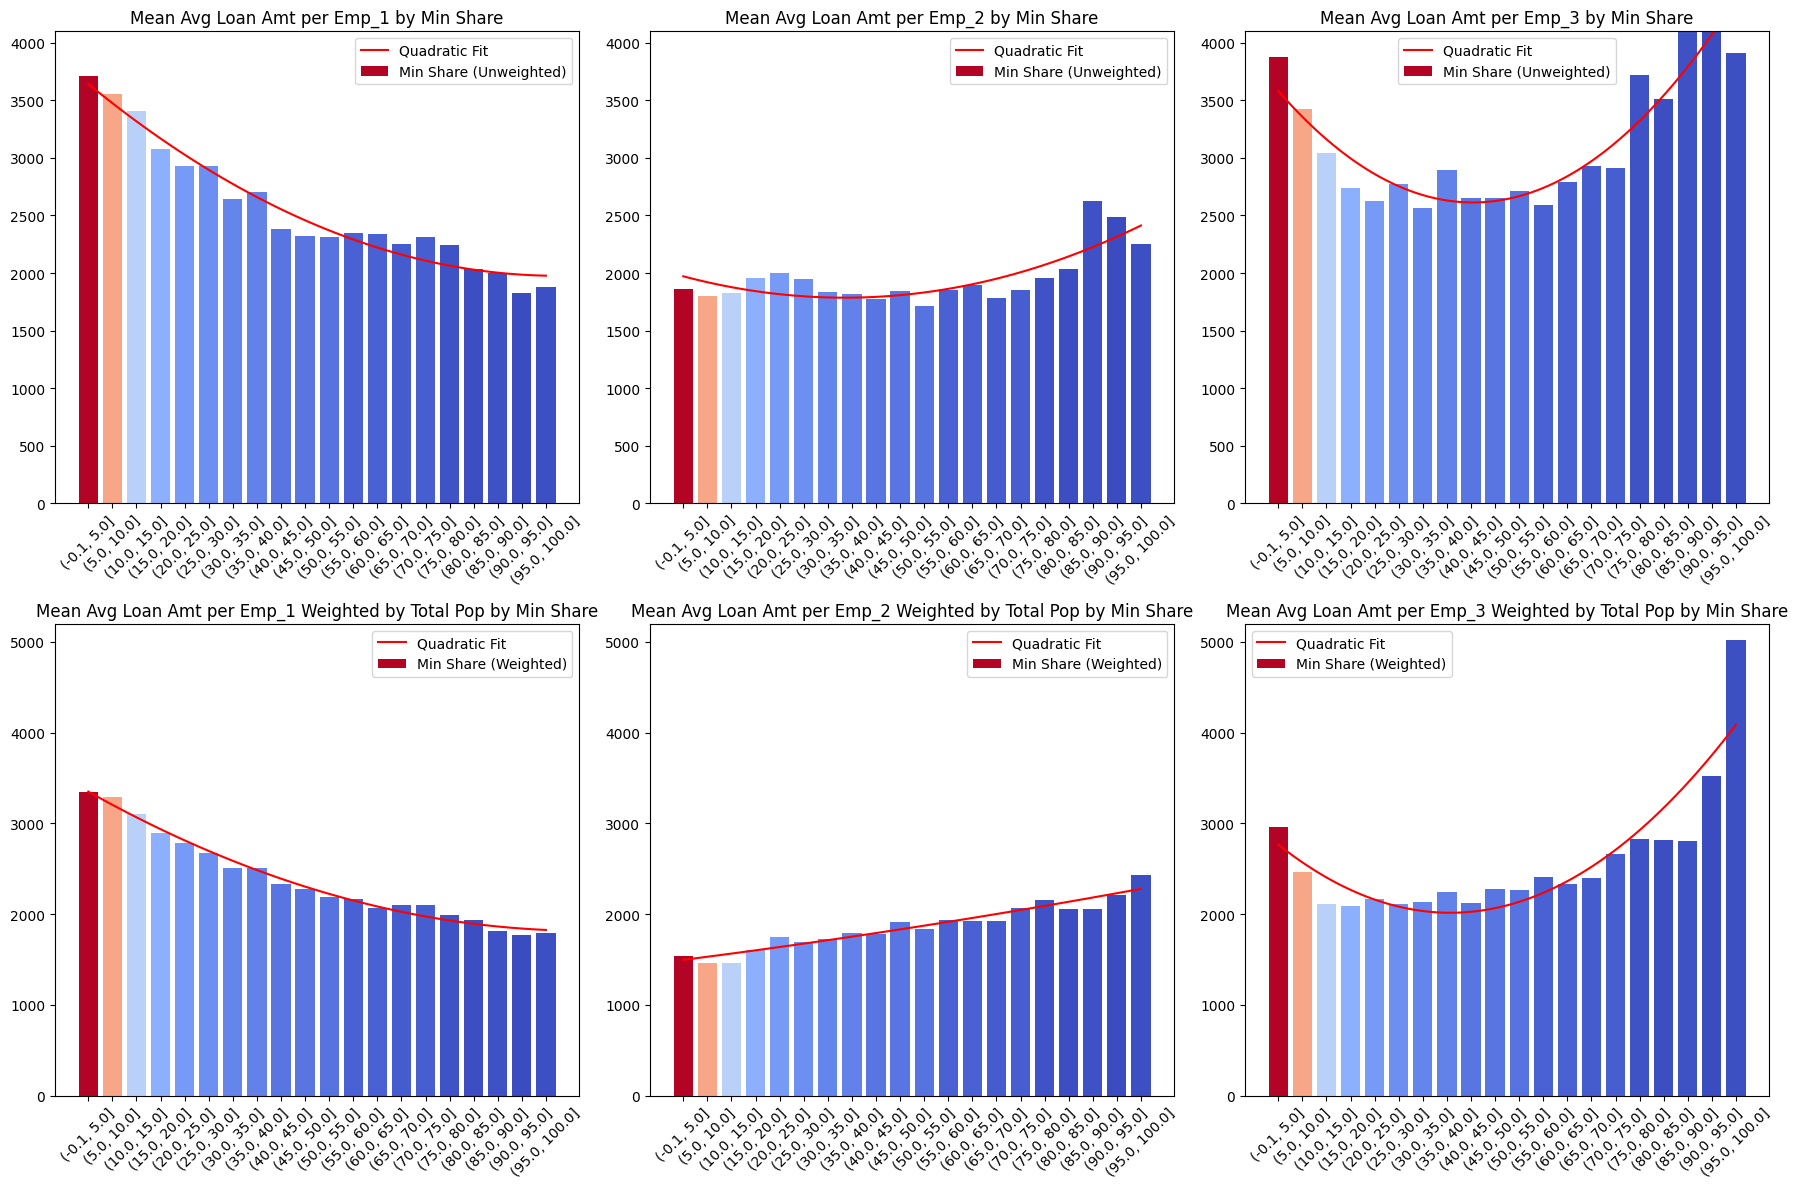

In [30]:
# Use the function to create the plots
plot_multi_binned_means(stats_df, 'Min Share', ['Avg Loan Amt per Emp_1', 
              'Avg Loan Amt per Emp_2',
              'Avg Loan Amt per Emp_3'], 'Total Pop', "Rural", y_limits=[[0, 4100], [0, 5200]])

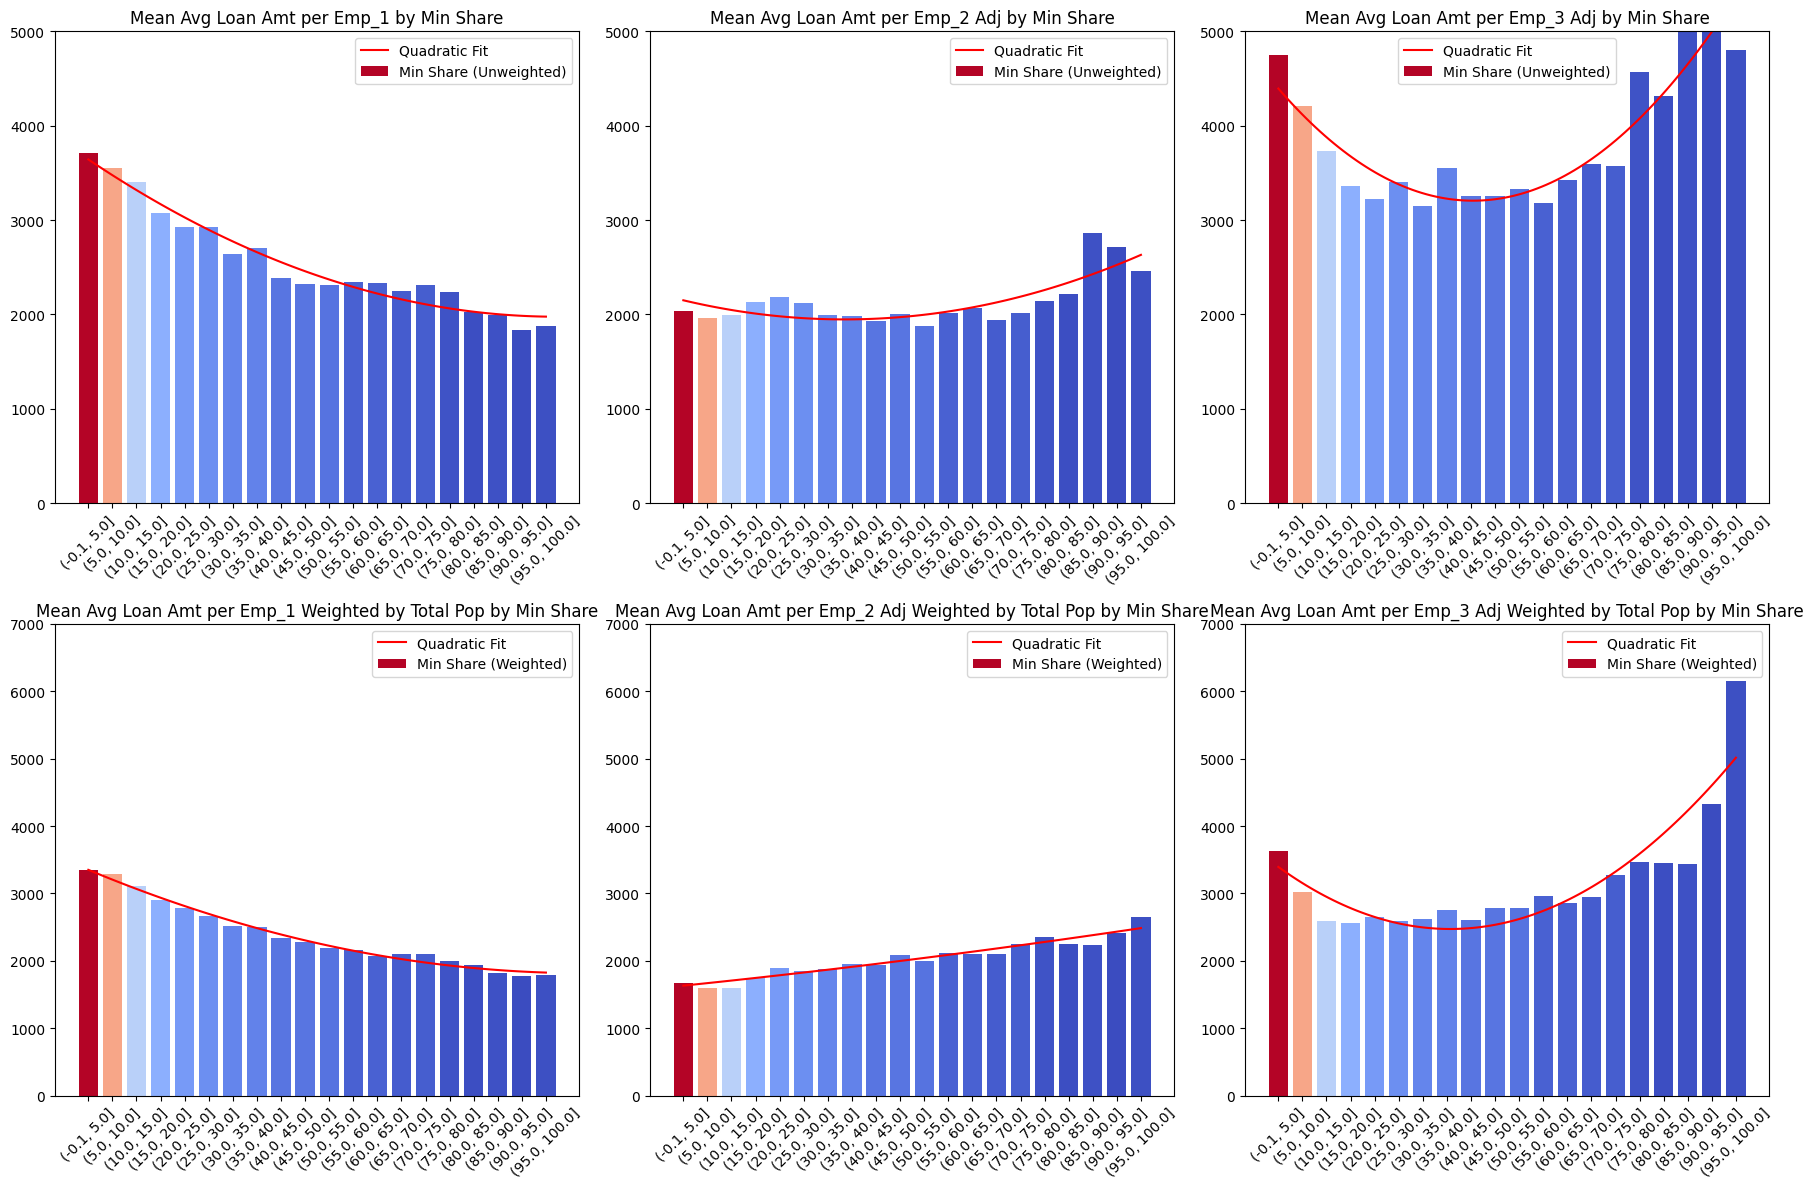

In [31]:
#Adjusted Rounds
plot_multi_binned_means(stats_df, 'Min Share', ['Avg Loan Amt per Emp_1', 
              'Avg Loan Amt per Emp_2 Adj',
              'Avg Loan Amt per Emp_3 Adj'], 'Total Pop', "Rural", y_limits=[[0, 5000], [0, 7000]])

In [32]:
def plot_multi_binned_means_single_chart(df, x_col, y_cols, weight_col, y_limits=None):
    # Initialize the figure
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    
    # Drop NaN values for relevant columns
    df = df.dropna(subset=[x_col] + y_cols + [weight_col])
    
    for j, measure in enumerate(['Unweighted', 'Weighted']):
        ax = axes[j]
        
        for i, y_col in enumerate(y_cols):
            title  = f'Mean {y_col}'
            
            # Create bins for the x column
            bin_label = f'{x_col} Bin'
            df[bin_label] = pd.cut(df[x_col], bins=20)
            
            if measure == 'Weighted':
                # Calculate weighted mean for each bin
                df['Weighted'] = df[y_col] * df[weight_col]
                grouped = df.groupby(bin_label).apply(lambda x: x['Weighted'].sum() / x[weight_col].sum()).reset_index(name=f'Weighted Mean {y_col}')
            else:
                # Calculate unweighted mean for each bin
                grouped = df.groupby(bin_label)[y_col].mean().reset_index()
            
            ax.plot(grouped[bin_label].astype(str), grouped[grouped.columns[-1]], label=f'{y_col} ({measure})')
        
        ax.set_xticklabels(grouped[bin_label].astype(str), rotation=45)
        title = f'Mean Loans per Employer by {x_col} ({measure})'
        ax.set_title(title)
        ax.legend()
        
        if y_limits:
            ax.set_ylim(y_limits[j])
    
    plt.tight_layout()
    plt.show()

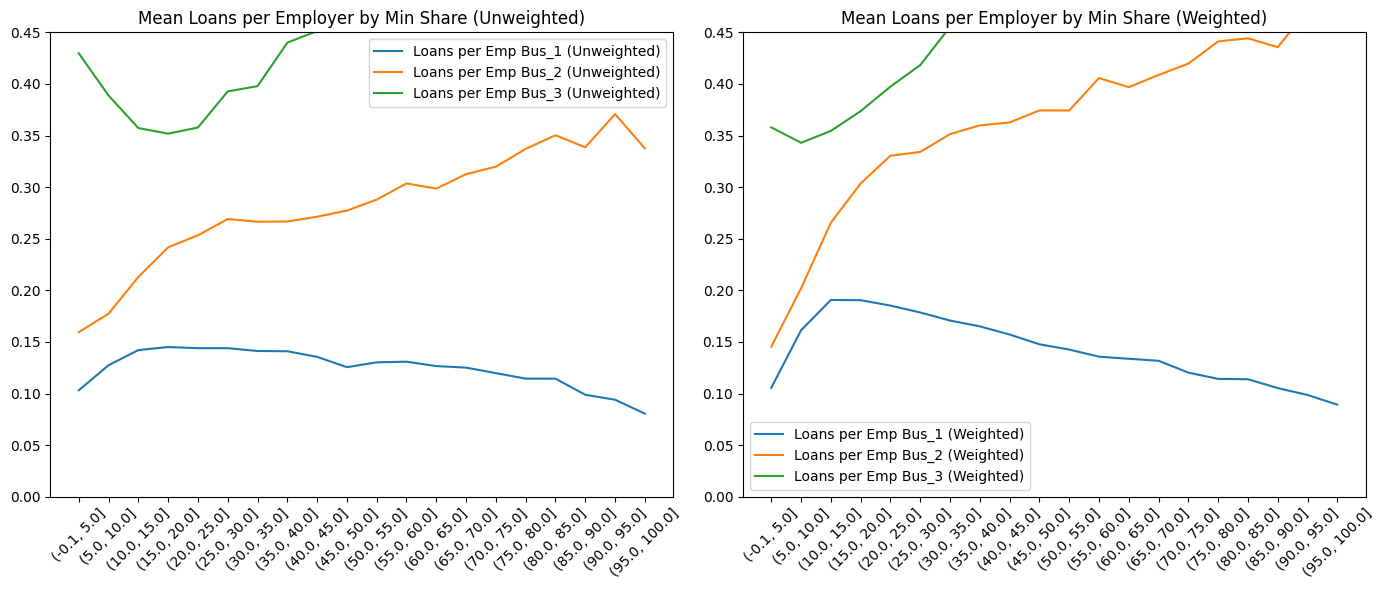

In [33]:
plot_multi_binned_means_single_chart(stats_df, 'Min Share', ["Loans per Emp Bus_1", 
              "Loans per Emp Bus_2",
              "Loans per Emp Bus_3"], 'Total Pop', y_limits=[[0, 0.45], [0, 0.45]])

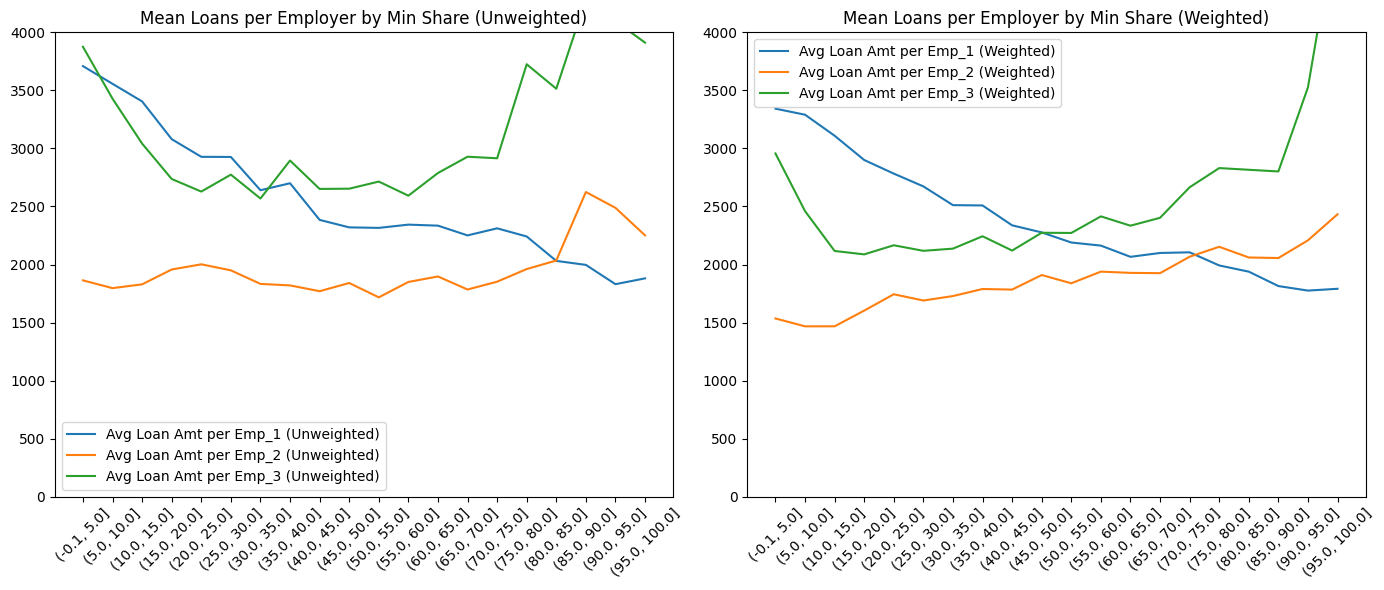

In [34]:
plot_multi_binned_means_single_chart(stats_df, 'Min Share', ['Avg Loan Amt per Emp_1', 
              'Avg Loan Amt per Emp_2',
              'Avg Loan Amt per Emp_3'], 'Total Pop', y_limits=[[0, 4000], [0, 4000]])

In [35]:
from scipy.stats import ttest_ind
import itertools

def ttest_quartiles(df, sorting_col):
    results = []
    columns = [col for col in df.columns if col != sorting_col]

    # Sort DataFrame based on the sorting column
    df_sorted = df.sort_values(by=sorting_col).dropna()

    n = len(df_sorted)

    # Generate all unique pairs of columns for t-testing
    pairs = list(itertools.combinations(columns, 2))

    for col1, col2 in pairs:
        # Compute quartiles for each column based on the sorted DataFrame
        quartiles_col1 = [
            df_sorted[col1][:n // 4],
            df_sorted[col1][n // 4: n // 2],
            df_sorted[col1][n // 2: 3 * n // 4],
            df_sorted[col1][3 * n // 4:]
        ]

        quartiles_col2 = [
            df_sorted[col2][:n // 4],
            df_sorted[col2][n // 4: n // 2],
            df_sorted[col2][n // 2: 3 * n // 4],
            df_sorted[col2][3 * n // 4:]
        ]

        # Perform t-tests for each quartile
        for i, (q1, q2) in enumerate(zip(quartiles_col1, quartiles_col2)):
            mean_diff = q1.mean() - q2.mean()
            _, p_value = ttest_ind(q1, q2, nan_policy='omit')
            results.append({
                'Column Pair': f"{col1} vs {col2}",
                'Quartile': i + 1,
                'Mean Difference': mean_diff,
                'P-Value': p_value,
                'Mean Col1': q1.mean(),
                'Mean Col2': q2.mean(),
                'Std Dev Col1': q1.std(),
                'Std Dev Col2': q2.std()
            })

    # Convert the results list to a DataFrame for better presentation
    results_df = pd.DataFrame(results)
    return results_df

In [36]:
df = stats_df[['Loans per Emp Bus_1', 
              'Loans per Emp Bus_2',
              'Loans per Emp Bus_3',
              'Min Share']].dropna()

results = ttest_quartiles(df, "Min Share")
results

Column Pair  Quartile  Mean Difference  \
0   Loans per Emp Bus_1 vs Loans per Emp Bus_2         1        -0.052984   
1   Loans per Emp Bus_1 vs Loans per Emp Bus_2         2        -0.064371   
2   Loans per Emp Bus_1 vs Loans per Emp Bus_2         3        -0.114220   
3   Loans per Emp Bus_1 vs Loans per Emp Bus_2         4        -0.182945   
4   Loans per Emp Bus_1 vs Loans per Emp Bus_3         1        -0.297160   
5   Loans per Emp Bus_1 vs Loans per Emp Bus_3         2        -0.221532   
6   Loans per Emp Bus_1 vs Loans per Emp Bus_3         3        -0.233560   
7   Loans per Emp Bus_1 vs Loans per Emp Bus_3         4        -0.574528   
8   Loans per Emp Bus_2 vs Loans per Emp Bus_3         1        -0.244177   
9   Loans per Emp Bus_2 vs Loans per Emp Bus_3         2        -0.157160   
10  Loans per Emp Bus_2 vs Loans per Emp Bus_3         3        -0.119340   
11  Loans per Emp Bus_2 vs Loans per Emp Bus_3         4        -0.391583   

          P-Value  Mean Col1  Mean Col2  Std Dev Col1  Std Dev Col2  
0   1.327707e-118   0.114032   0.167016      0.122257      0.164554  
1   1.004872e-179   0.140374   0.204746      0.114555      0.165004  
2    0.000000e+00   0.143707   0.257927      0.103183      0.176406  
3    0.000000e+00   0.121552   0.304498      0.104121      0.208305  
4    0.000000e+00   0.114032   0.411192      0.122257      0.346758  
5    0.000000e+00   0.140374   0.361906      0.114555      0.233599  
6    0.000000e+00   0.143707   0.377267      0.103183      0.264419  
7    0.000000e+00   0.121552   0.696081      0.104121      0.947816  
8    0.000000e+00   0.167016   0.411192      0.164554      0.346758  
9    0.000000e+00   0.204746   0.361906      0.165004      0.233599  
10  1.140464e-243   0.257927   0.377267      0.176406      0.264419  
11  9.833799e-280   0.304498   0.696081      0.208305      0.947816

In [37]:
df = stats_df[['Avg Loan Amt per Emp_1', 
              'Avg Loan Amt per Emp_2',
              'Avg Loan Amt per Emp_3',
              'Min Share']].dropna()

results = ttest_quartiles(df, "Min Share")
results

Column Pair  Quartile  \
0   Avg Loan Amt per Emp_1 vs Avg Loan Amt per Emp_2         1   
1   Avg Loan Amt per Emp_1 vs Avg Loan Amt per Emp_2         2   
2   Avg Loan Amt per Emp_1 vs Avg Loan Amt per Emp_2         3   
3   Avg Loan Amt per Emp_1 vs Avg Loan Amt per Emp_2         4   
4   Avg Loan Amt per Emp_1 vs Avg Loan Amt per Emp_3         1   
5   Avg Loan Amt per Emp_1 vs Avg Loan Amt per Emp_3         2   
6   Avg Loan Amt per Emp_1 vs Avg Loan Amt per Emp_3         3   
7   Avg Loan Amt per Emp_1 vs Avg Loan Amt per Emp_3         4   
8   Avg Loan Amt per Emp_2 vs Avg Loan Amt per Emp_3         1   
9   Avg Loan Amt per Emp_2 vs Avg Loan Amt per Emp_3         2   
10  Avg Loan Amt per Emp_2 vs Avg Loan Amt per Emp_3         3   
11  Avg Loan Amt per Emp_2 vs Avg Loan Amt per Emp_3         4   

    Mean Difference        P-Value    Mean Col1    Mean Col2  Std Dev Col1  \
0       1820.629541   1.067524e-85  3615.713809  1795.084268   7605.912541   
1       1541.147873  2.490797e-119  3410.217279  1869.069406   4758.966198   
2        973.147332   2.449572e-73  2901.250104  1928.102773   3366.030581   
3        312.831624   1.834589e-11  2245.371632  1932.540009   2756.223089   
4         21.044133   8.432977e-01  3615.713809  3594.669677   7605.912541   
5        259.229200   2.056467e-03  3410.217279  3150.988079   4758.966198   
6        208.110219   1.094780e-04  2901.250104  2693.139885   3366.030581   
7       -805.365175   2.411817e-29  2245.371632  3050.736808   2756.223089   
8      -1799.585409  9.490972e-146  1795.084268  3594.669677   2750.445737   
9      -1281.918673   3.397822e-66  1869.069406  3150.988079   3260.753776   
10      -765.037113   4.926954e-47  1928.102773  2693.139885   3261.231168   
11     -1118.196799   7.000334e-53  1932.540009  3050.736808   3009.443710   

    Std Dev Col2  
0    2750.445737  
1    3260.753776  
2    3261.231168  
3    3009.443710  
4    5414.932187  
5    5635.626498  
6    3304.730724  
7    5629.433731  
8    5414.932187  
9    5635.626498  
10   3304.730724  
11   5629.433731

In [38]:
df = stats_df[['Avg Loan Amt per Emp_1', 
              'Avg Loan Amt per Emp_2 Adj',
              'Avg Loan Amt per Emp_3 Adj',
              'Min Share']].dropna()

results = ttest_quartiles(df, "Min Share")
results

Column Pair  Quartile  \
0   Avg Loan Amt per Emp_1 vs Avg Loan Amt per Emp...         1   
1   Avg Loan Amt per Emp_1 vs Avg Loan Amt per Emp...         2   
2   Avg Loan Amt per Emp_1 vs Avg Loan Amt per Emp...         3   
3   Avg Loan Amt per Emp_1 vs Avg Loan Amt per Emp...         4   
4   Avg Loan Amt per Emp_1 vs Avg Loan Amt per Emp...         1   
5   Avg Loan Amt per Emp_1 vs Avg Loan Amt per Emp...         2   
6   Avg Loan Amt per Emp_1 vs Avg Loan Amt per Emp...         3   
7   Avg Loan Amt per Emp_1 vs Avg Loan Amt per Emp...         4   
8   Avg Loan Amt per Emp_2 Adj vs Avg Loan Amt per...         1   
9   Avg Loan Amt per Emp_2 Adj vs Avg Loan Amt per...         2   
10  Avg Loan Amt per Emp_2 Adj vs Avg Loan Amt per...         3   
11  Avg Loan Amt per Emp_2 Adj vs Avg Loan Amt per...         4   

    Mean Difference        P-Value    Mean Col1    Mean Col2  Std Dev Col1  \
0       1657.950030   4.665426e-70  3615.713809  1957.763780   7605.912541   
1       1371.763458   5.051776e-90  3410.217279  2038.453821   4758.966198   
2        798.413018   4.305296e-46  2901.250104  2102.837086   3366.030581   
3        137.695186   4.840722e-03  2245.371632  2107.676447   2756.223089   
4       -793.916128   5.586186e-12  3615.713809  4409.629937   7605.912541   
5       -455.142438   1.988355e-06  3410.217279  3865.359717   4758.966198   
6       -402.461038   2.167899e-11  2901.250104  3303.711142   3366.030581   
7      -1497.008494   4.166079e-69  2245.371632  3742.380126   2756.223089   
8      -2451.866158  3.768244e-186  1957.763780  4409.629937   2999.704881   
9      -1826.905896   3.946929e-93  2038.453821  3865.359717   3556.259587   
10     -1200.874056   6.288438e-84  2102.837086  3303.711142   3556.780243   
11     -1634.703679   1.359608e-77  2107.676447  3742.380126   3282.174546   

    Std Dev Col2  
0    2999.704881  
1    3556.259587  
2    3556.780243  
3    3282.174546  
4    6642.570591  
5    6913.299289  
6    4053.957900  
7    6905.702538  
8    6642.570591  
9    6913.299289  
10   4053.957900  
11   6905.702538

In [39]:
stats_df.describe()

Min Share  Min Share Excl B   Black Share   White Share  \
count  33499.000000      33499.000000  33499.000000  33499.000000   
mean      26.023626         18.685290      7.338336     73.976374   
std       24.494465         19.567009     14.876679     24.494465   
min        0.000000          0.000000      0.000000      0.000000   
25%        7.683130          6.470686      0.267693     62.962963   
50%       16.176471         10.865439      1.015359     83.823529   
75%       37.037037         22.846588      6.392407     92.316870   
max      100.000000        100.000000    100.000000    100.000000   

        Asian Share    Hisp Share  Native Share         Rural         PC Inc  \
count  33499.000000  33499.000000  33499.000000  33499.000000   32632.000000   
mean       2.324945     10.069490      1.781742     64.657928   34101.708599   
std        5.771987     15.476348      9.249141     44.045218   16903.677372   
min        0.000000      0.000000      0.000000      0.000000     289.000000   
25%        0.153178      1.855783      0.083893      8.883458   24899.750000   
50%        0.511740      4.078116      0.221484    100.000000   30809.500000   
75%        1.729935     10.616700      0.521974    100.000000   38877.000000   
max      100.000000    100.000000    100.000000    100.000000  701688.000000   

               Gini  ...  Loans per Emp Bus  Avg Loan Amt per Emp  \
count  32275.000000  ...       32638.000000          30771.000000   
mean      41.131506  ...           0.825080           8046.689774   
std        8.172452  ...           0.676399           9379.915828   
min        0.020000  ...           0.000000              0.000000   
25%       37.320000  ...           0.473684           4266.402184   
50%       41.540000  ...           0.747057           6499.768458   
75%       45.720000  ...           1.026115           9471.686101   
max       82.760000  ...          20.000000         340050.640000   

       Loans per Emp Bus_1  Avg Loan Amt per Emp_1  Loans per Emp Bus_2  \
count         32638.000000            30771.000000         32638.000000   
mean              0.129916             3043.119599             0.233548   
std               0.111998             5013.227339             0.186874   
min               0.000000                0.000000             0.000000   
25%               0.054878             1124.720434             0.106667   
50%               0.112974             2307.865169             0.195942   
75%               0.184929             3784.581311             0.330045   
max               3.000000           331865.666667             5.000000   

       Avg Loan Amt per Emp_2  Loans per Emp Bus_3  Avg Loan Amt per Emp_3  \
count            30771.000000         32638.000000            30771.000000   
mean              1881.201912             0.461616             3122.368264   
std               3078.100043             0.551725             5101.378440   
min                  0.000000             0.000000                0.000000   
25%                620.007874             0.227686             1212.000299   
50%               1276.857923             0.366308             2089.612122   
75%               2318.220470             0.533457             3508.274530   
max             174665.000000            18.833333           236954.520000   

       Avg Loan Amt per Emp_2 Adj  Avg Loan Amt per Emp_3 Adj  
count                30771.000000                30771.000000  
mean                  2051.685836                 3830.251403  
std                   3357.052859                 6257.929966  
min                      0.000000                    0.000000  
25%                    676.196088                 1486.777168  
50%                   1392.573172                 2563.355467  
75%                   2528.309200                 4303.647842  
max                 190494.015625               290675.316274  

[8 rows x 31 columns]

In [40]:
def perform_ttests(df, round1_col, round2_col, round3_col, minority_share_col):
    # Create quartile labels
    quartile_labels = ['0-25%', '25-50%', '50-75%', '75-100%']
    
    # Cut the DataFrame into quartiles
    df['Quartile'] = pd.qcut(df[minority_share_col], 4, labels=quartile_labels)
    
    # Initialize result dictionary
    results = {}
    
    # Loop through each round to perform t-tests
    for round_col in [round1_col, round2_col, round3_col]:
        
        # Calculate average and standard deviation of funding for each quartile (ignoring NaNs)
        group_stats = df.groupby('Quartile')[round_col].agg(['mean', 'std'])
        
        # Initialize mean differences list
        mean_diffs = []
        
        # Perform t-tests between all combinations of quartiles (ignoring NaNs)
        for i, q1 in enumerate(quartile_labels):
            for j, q2 in enumerate(quartile_labels):
                if i >= j:
                    continue
                data1 = df[df['Quartile'] == q1][round_col].dropna()
                data2 = df[df['Quartile'] == q2][round_col].dropna()
                
                if data1.empty or data2.empty:
                    continue
                
                _, p_val = ttest_ind(data1, data2)
                mean_diff = data1.mean() - data2.mean()
                mean_diffs.append(f"{q1}-{q2}: Δ={mean_diff:.4f}, p={p_val:.4f}")
        
        # Store results in dictionary
        results[round_col] = {'Group Stats': group_stats, 'Mean Differences': mean_diffs}
    
    # Create output table
    output_table = pd.DataFrame(columns=['Round', 'Quartile', 'Avg. Funding', 'Std. Dev.', 'Mean Differences'])
    for round_col in [round1_col, round2_col, round3_col]:
        for quartile in quartile_labels:
            avg_funding = results[round_col]['Group Stats'].loc[quartile, 'mean']
            std_dev = results[round_col]['Group Stats'].loc[quartile, 'std']
            mean_diffs = ', '.join([d for d in results[round_col]['Mean Differences'] if quartile in d])
            output_table = output_table.append({'Round': round_col, 'Quartile': quartile, 'Avg. Funding': avg_funding, 'Std. Dev.': std_dev, 'Mean Differences': mean_diffs}, ignore_index=True)
    
    return output_table

In [41]:
df = stats_df[['Loans per Emp Bus_1', 'Loans per Emp Bus_2', 'Loans per Emp Bus_3', "Min Share"]].dropna()

out = perform_ttests(df, 'Loans per Emp Bus_1', 'Loans per Emp Bus_2', 'Loans per Emp Bus_3', "Min Share")
out.to_csv("Ttests.csv")

In [42]:
df = stats_df[['Avg Loan Amt per Emp_1', 
              'Avg Loan Amt per Emp_2',
              'Avg Loan Amt per Emp_3', "Min Share"]].dropna()

out = perform_ttests(df, 'Avg Loan Amt per Emp_1', 
              'Avg Loan Amt per Emp_2',
              'Avg Loan Amt per Emp_3', "Min Share")
out.to_csv("Ttests.csv")

In [43]:
def plot_multi_binned_means(df, x_col, y_cols, weight_col, region_col, y_limits=None):
    # Initialize the figure
    n = len(y_cols)
    fig, axes = plt.subplots(2, n, figsize=(n * 6, 12))
    
    # Drop NaN values for relevant columns
    df = df.dropna(subset=[x_col] + y_cols + [weight_col, region_col])
    
    # Get unique regions
    unique_regions = df[region_col].unique()
    
    for i, y_col in enumerate(y_cols):
        for j, measure in enumerate(['Unweighted', 'Weighted']):
            ax = axes[j, i]
            title  = f'Mean {y_col}'
            
            # Create bins for the x column
            bin_label = f'{x_col} Bin'
            df[bin_label] = pd.cut(df[x_col], bins=20)
            
            # Calculate the total mean for each bin
            if measure == 'Weighted':
                df['Weighted'] = df[y_col] * df[weight_col]
                total_means = df.groupby(bin_label).apply(lambda x: x['Weighted'].sum() / x[weight_col].sum()).reset_index(name=f'Weighted Mean {y_col}')
                title += f" Weighted by {weight_col}"
            else:
                total_means = df.groupby(bin_label)[y_col].mean().reset_index()
            
            # Initialize the bottom array for stacked bars
            bottom = np.zeros(len(total_means))
            
            for region in unique_regions:
                region_df = df[df[region_col] == region]
                
                # Calculate the proportion of each region within each bin
                region_proportion = region_df.groupby(bin_label).size() / df.groupby(bin_label).size()
                region_proportion = region_proportion.reset_index(name=f'Proportion {region}')
                
                # Calculate the height of the bar section for the current region
                bar_section_height = region_proportion[f'Proportion {region}'] * total_means[total_means.columns[-1]]
                
                # Add the stacked bar section for the current region
                ax.bar(total_means[bin_label].astype(str), bar_section_height, bottom=bottom, label=f'{region} ({measure})')
                bottom += bar_section_height.values
            
            # Perform quadratic regression on the total means
            x_data = np.arange(len(total_means[bin_label]))
            y_data = total_means[total_means.columns[-1]].values
            coeffs = np.polyfit(x_data, y_data, 2)
            poly_eq = np.poly1d(coeffs)
            x_poly = np.linspace(min(x_data), max(x_data), 100)
            y_poly = poly_eq(x_poly)
            ax.plot(x_poly, y_poly, 'r-', label='Quadratic Fit')
            
            ax.set_xticks(x_data)
            ax.set_xticklabels(total_means[bin_label].astype(str), rotation=45)
            title += f' by {x_col}'
            ax.set_title(title)
            
            if y_limits:
                ax.set_ylim(y_limits[j])
                
            ax.legend()
    
    plt.tight_layout()
    plt.show()

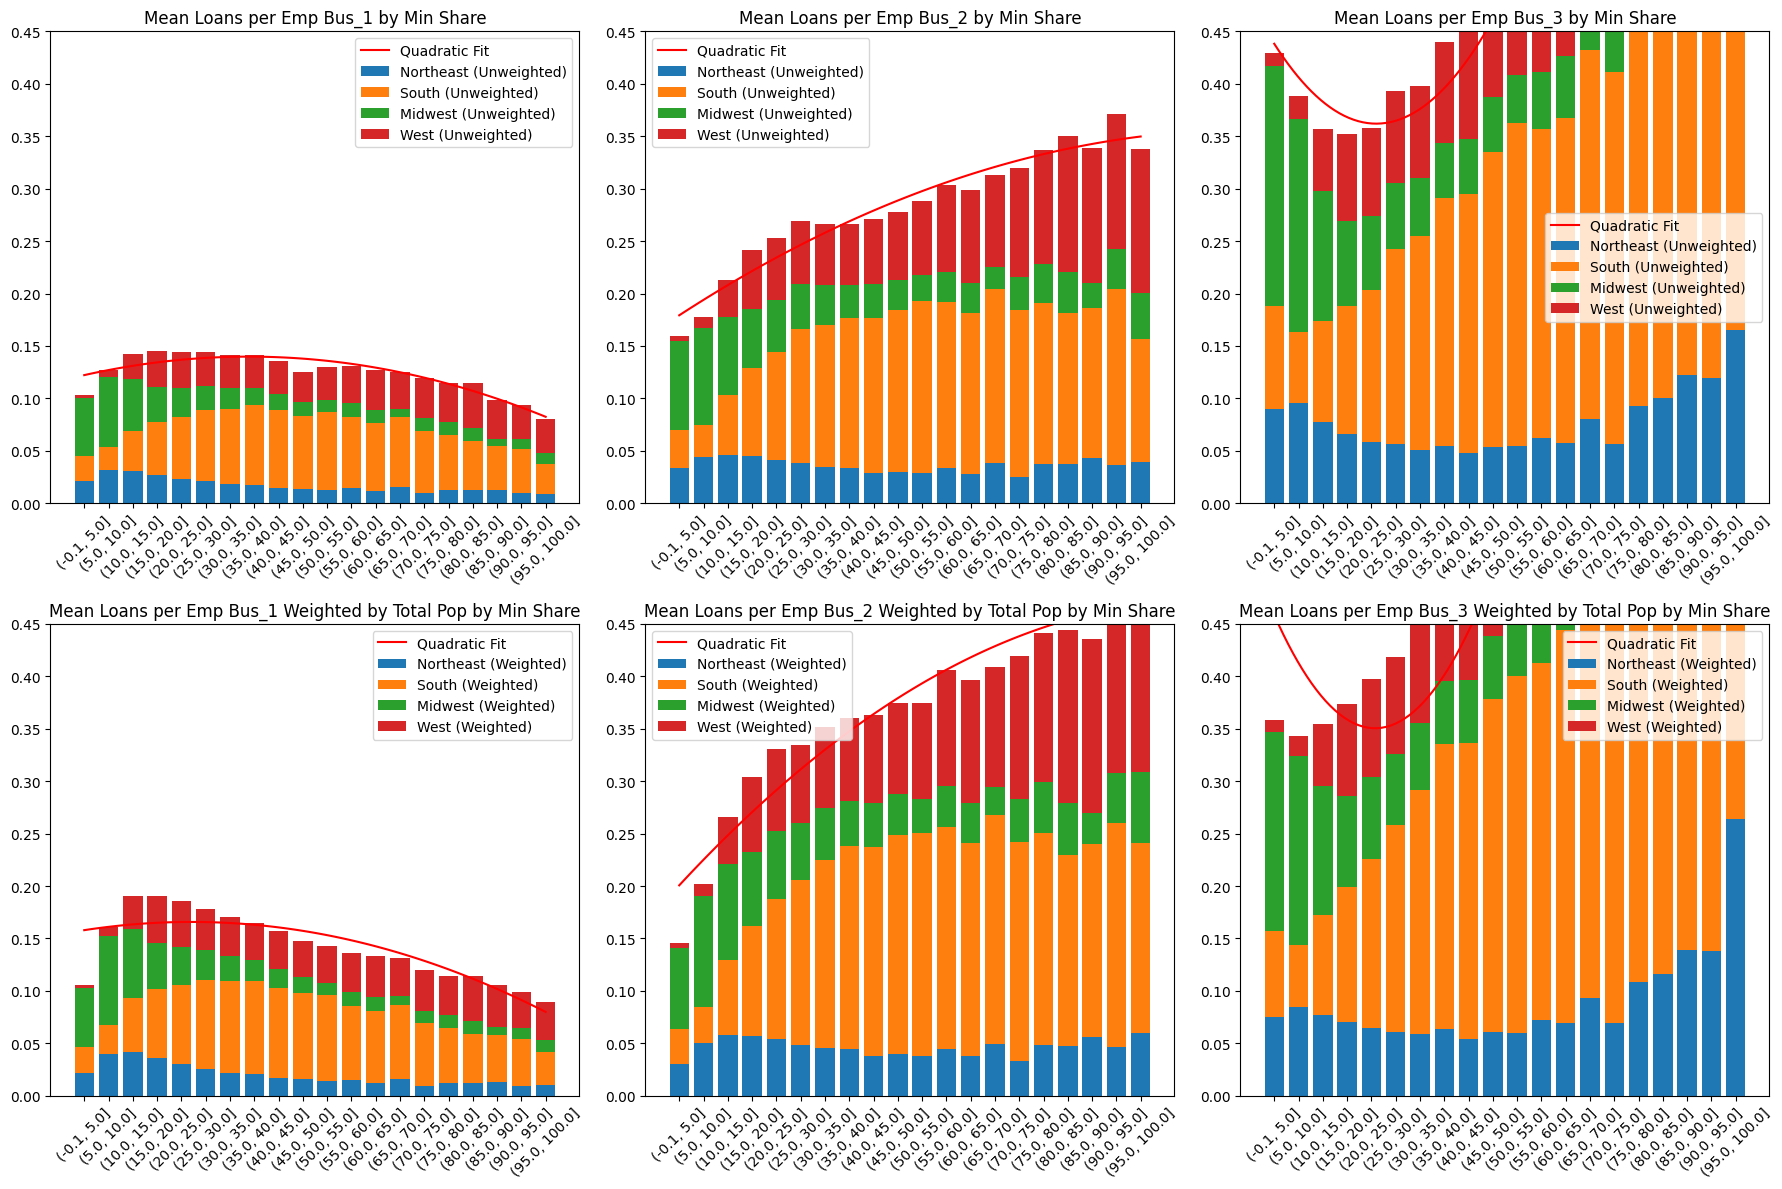

In [44]:
plot_multi_binned_means(stats_df, 'Min Share', ["Loans per Emp Bus_1", 
              "Loans per Emp Bus_2",
              "Loans per Emp Bus_3"], 'Total Pop', "Census Region", y_limits=[[0, 0.45], [0, 0.45]])

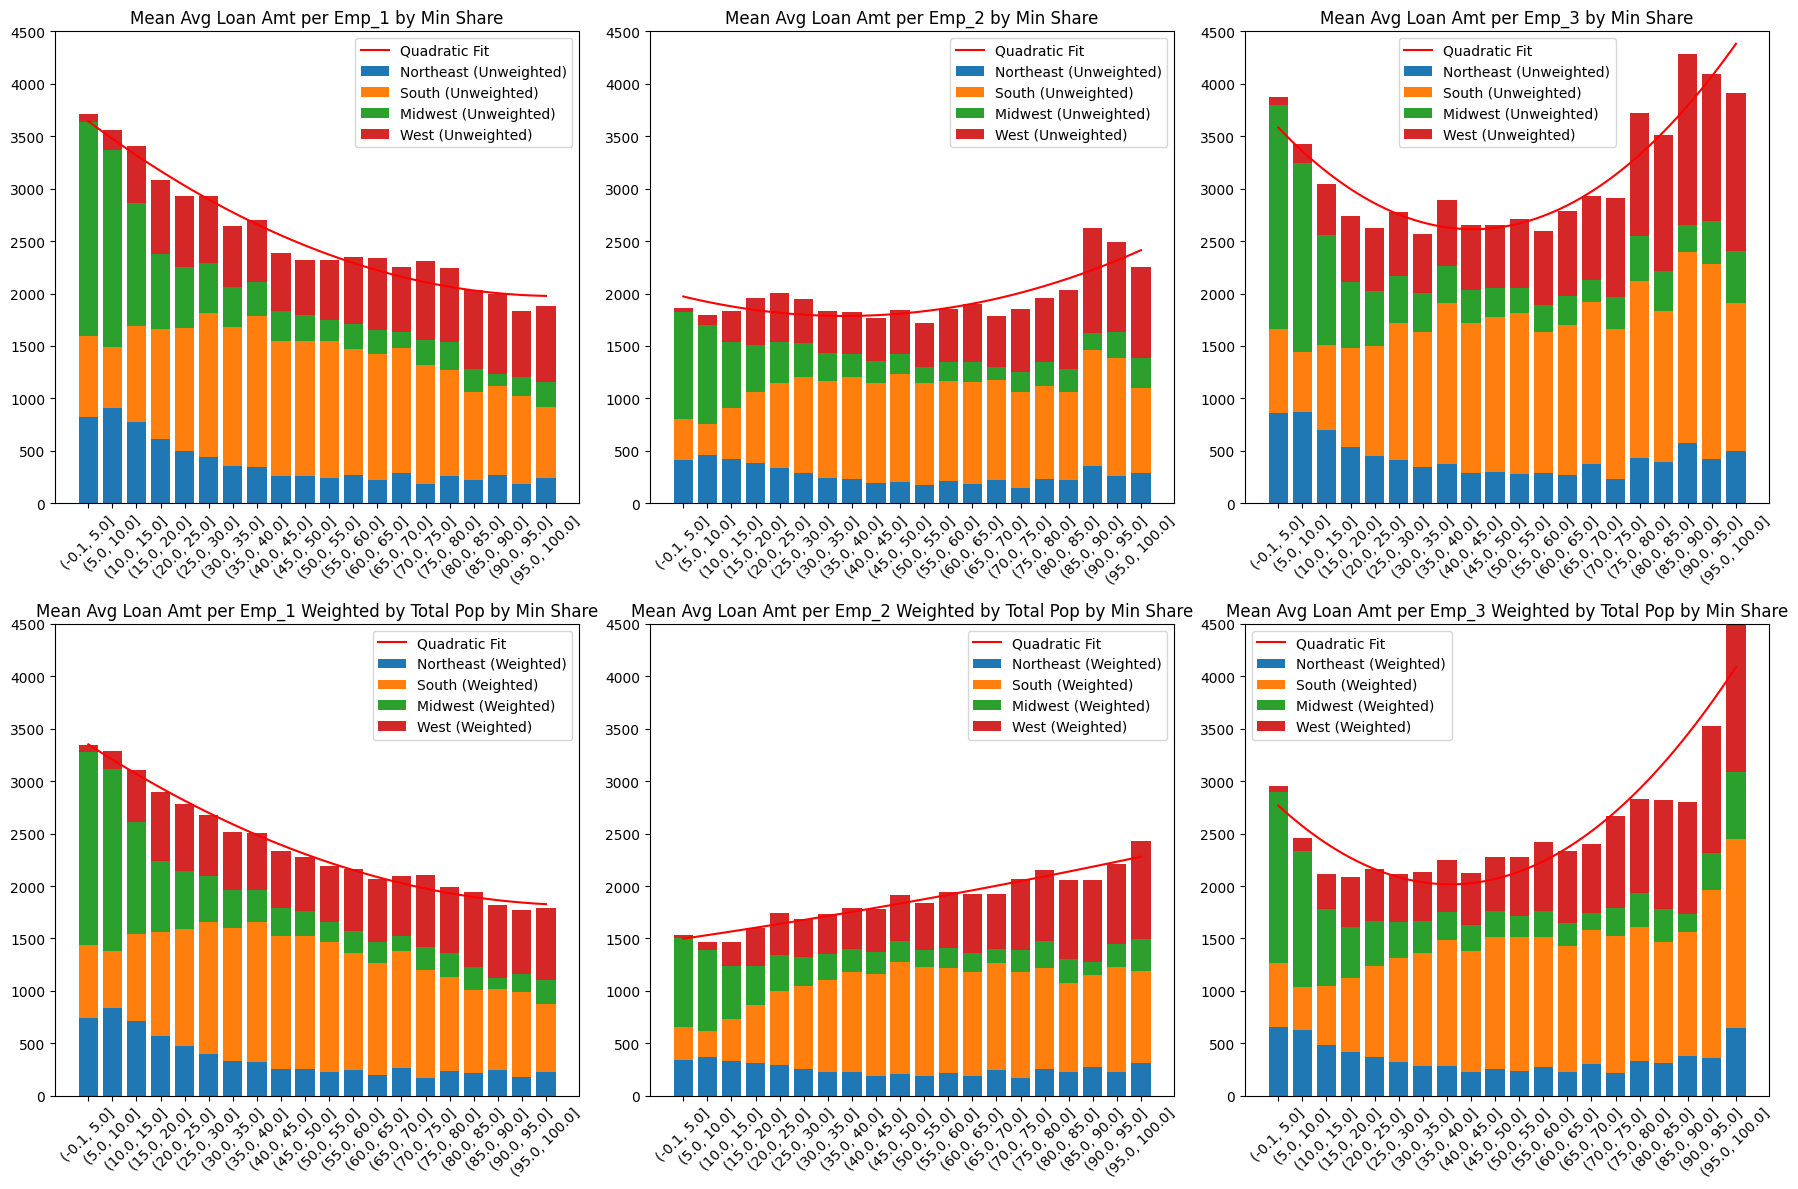

In [45]:
plot_multi_binned_means(stats_df, 'Min Share', ['Avg Loan Amt per Emp_1', 
              'Avg Loan Amt per Emp_2',
              'Avg Loan Amt per Emp_3'], 'Total Pop', "Census Region", y_limits=[[0, 4500], [0, 4500]])

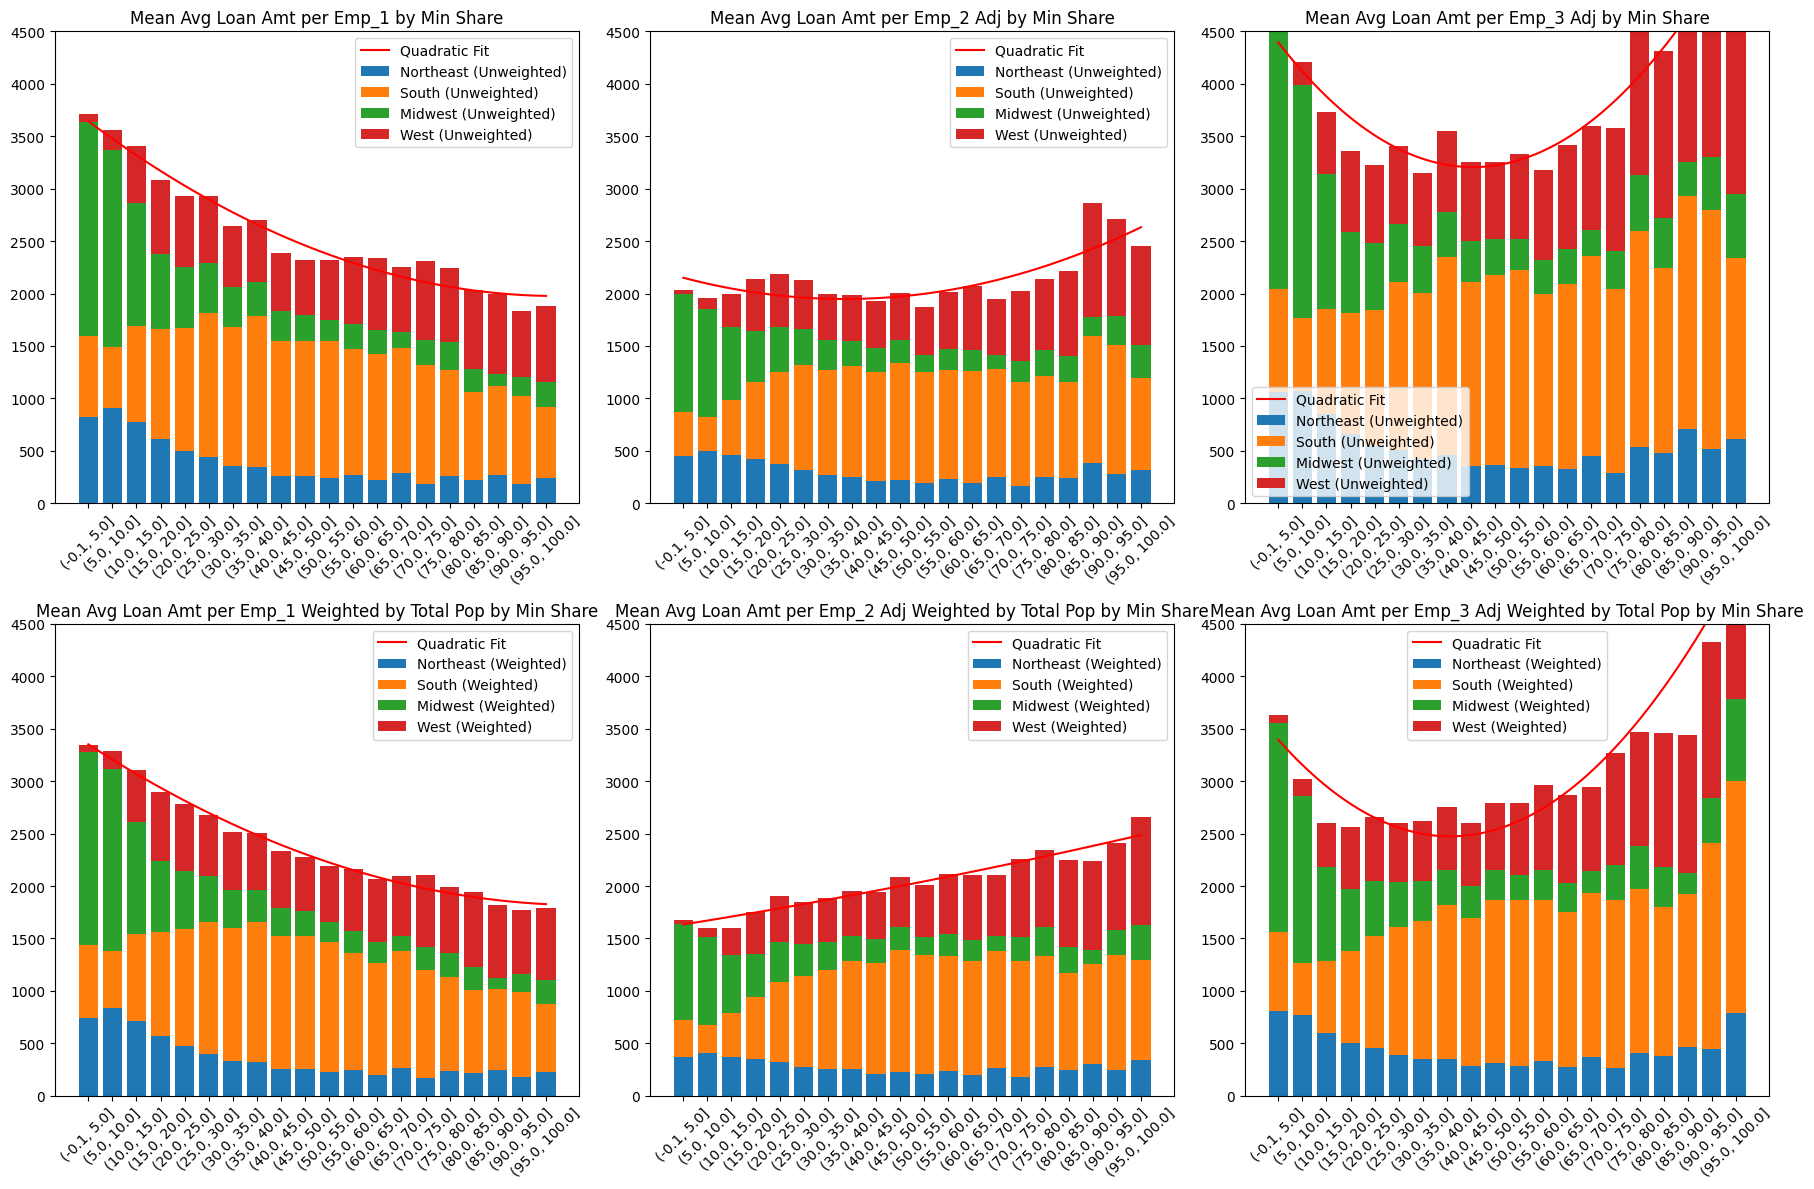

In [46]:
plot_multi_binned_means(stats_df, 'Min Share', ['Avg Loan Amt per Emp_1', 
              'Avg Loan Amt per Emp_2 Adj',
              'Avg Loan Amt per Emp_3 Adj'], 'Total Pop', "Census Region", y_limits=[[0, 4500], [0, 4500]])

In [47]:
def plot_multi_binned_means(df, x_col, y_cols, weight_col, region_col, y_limits=None):
    # Initialize the figure
    n = len(y_cols)
    fig, axes = plt.subplots(2, n, figsize=(n * 6, 12))
    
    # Drop NaN values for relevant columns
    df = df.dropna(subset=[x_col] + y_cols + [weight_col, region_col])
    
    # Get unique regions
    unique_regions = df[region_col].unique()
    
    for i, y_col in enumerate(y_cols):
        for j, measure in enumerate(['Unweighted', 'Weighted']):
            ax = axes[j, i]
            title  = f'Mean {y_col}'
            
            # Create bins for the x column
            bin_label = f'{x_col} Bin'
            df[bin_label] = pd.cut(df[x_col], bins=20)
            
            # Calculate the total mean for each bin
            if measure == 'Weighted':
                df['Weighted'] = df[y_col] * df[weight_col]
                total_means = df.groupby(bin_label).apply(lambda x: x['Weighted'].sum() / x[weight_col].sum()).reset_index(name=f'Weighted Mean {y_col}')
                title += f" Weighted by {weight_col}"
            else:
                total_means = df.groupby(bin_label)[y_col].mean().reset_index()
            
            # Plotting the bar graph for the means
            ax.bar(total_means[bin_label].astype(str), total_means[total_means.columns[-1]], label=f'Mean {y_col} ({measure})', alpha = 0.2)
            
            # Create a secondary axis for percentages
            ax2 = ax.twinx()
            
            for region in unique_regions:
                region_df = df[df[region_col] == region]
                
                # Calculate the proportion of each region within each bin
                region_proportion = region_df.groupby(bin_label).size() / df.groupby(bin_label).size() * 100
                region_proportion = region_proportion.reset_index(name=f'Proportion {region}')
                
                # Plot the line graph for the region proportion
                ax2.plot(region_proportion[bin_label].astype(str), region_proportion[f'Proportion {region}'], label=f'{region} ({measure})')
                
            # Perform quadratic regression on the total means
            x_data = np.arange(len(total_means[bin_label]))
            y_data = total_means[total_means.columns[-1]].values
            coeffs = np.polyfit(x_data, y_data, 2)
            poly_eq = np.poly1d(coeffs)
            x_poly = np.linspace(min(x_data), max(x_data), 100)
            y_poly = poly_eq(x_poly)
#             ax.plot(x_poly, y_poly, 'r-', label='Quadratic Fit')
            
            ax.set_xticks(x_data)
            ax.set_xticklabels(total_means[bin_label].astype(str), rotation=45)
            title += f' by {x_col}'
            ax.set_title(title)
            
            if y_limits:
                ax.set_ylim(y_limits[j])
            
            # Set the limit of the secondary y-axis to 0-100%
            ax2.set_ylim(0, 100)
            
#             ax.legend(loc='upper left')
            ax2.legend(loc='upper right')
    
    plt.tight_layout()
    plt.show()

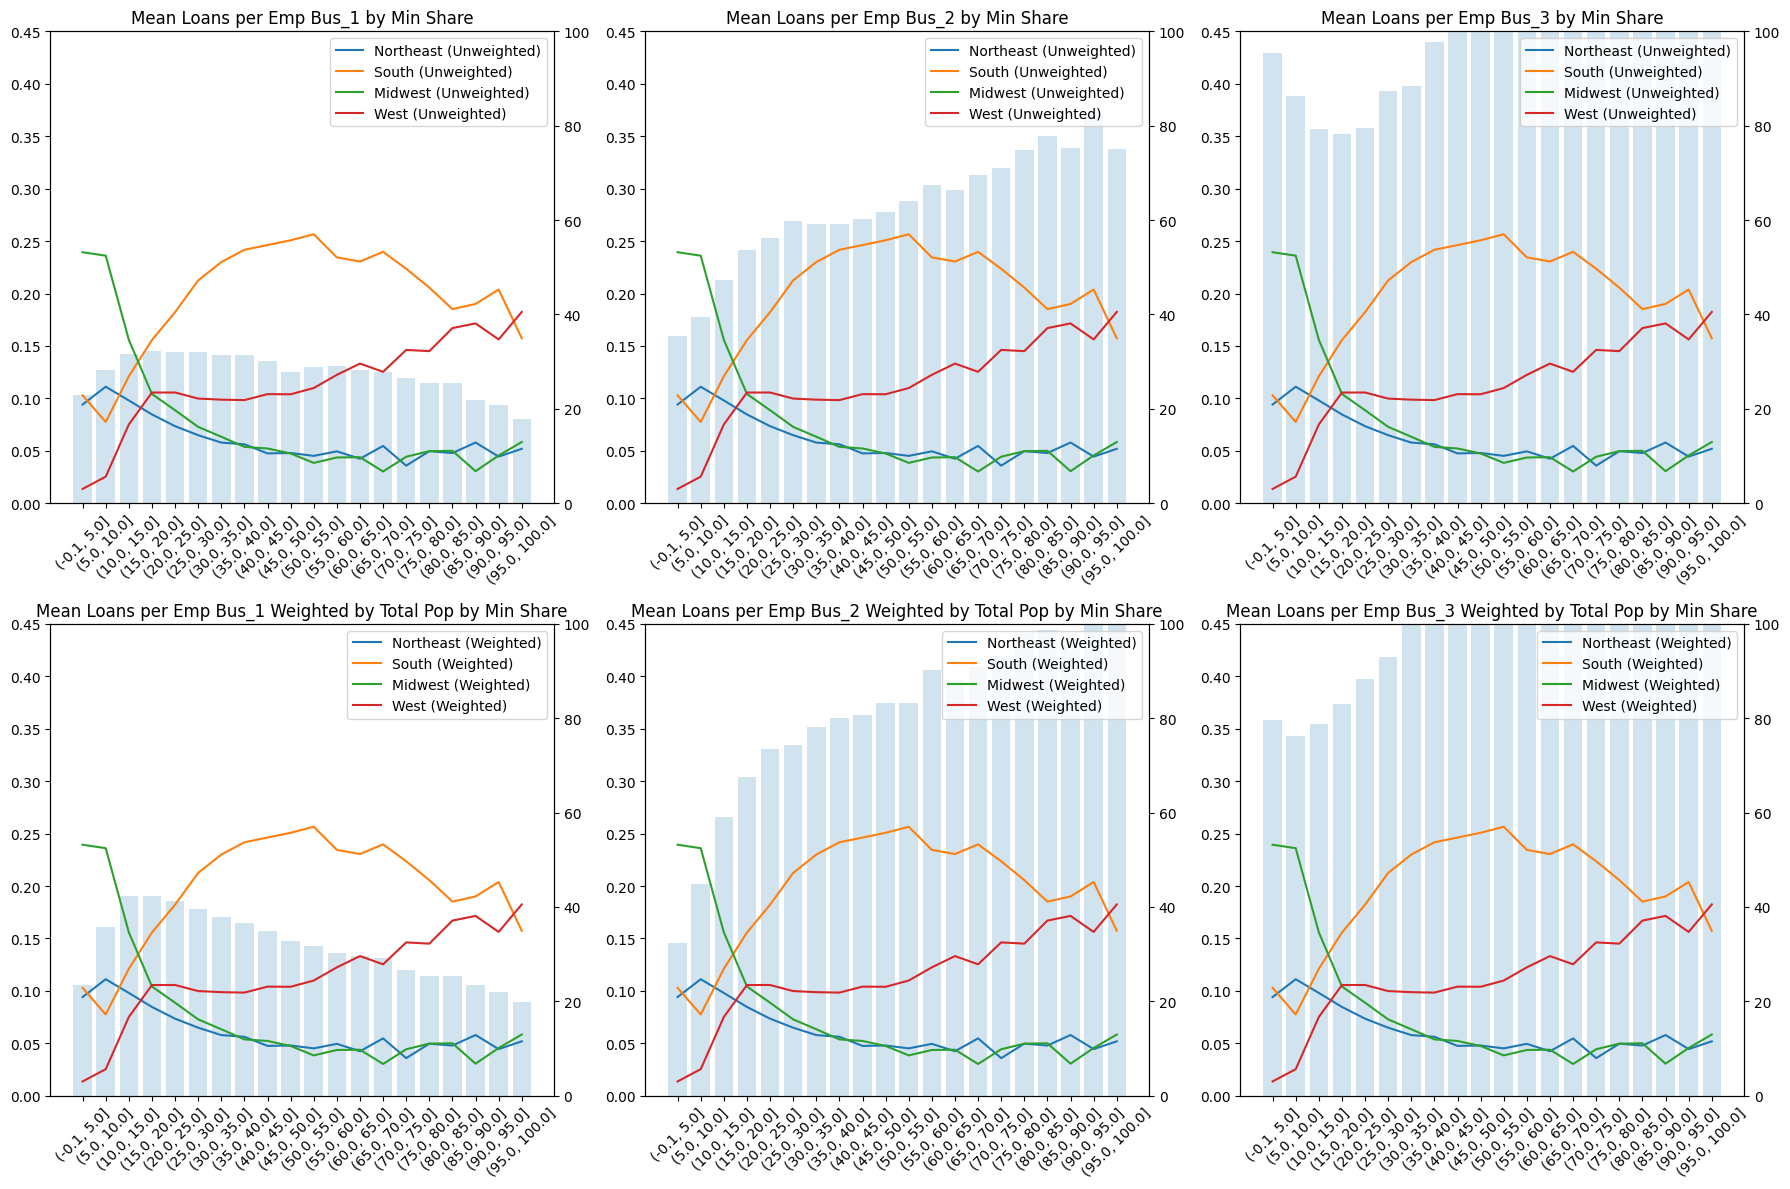

In [48]:
plot_multi_binned_means(stats_df, 'Min Share', ["Loans per Emp Bus_1", 
              "Loans per Emp Bus_2",
              "Loans per Emp Bus_3"], 'Total Pop', "Census Region", y_limits=[[0, 0.45], [0, 0.45]])

In [49]:
def plot_multi_binned_means(df, x_col, y_cols, weight_col, color_col, y_limits=None):
    # Initialize the figure
    n = len(y_cols)
    fig, axes = plt.subplots(2, n, figsize=(n * 6, 12))
    
    # Drop NaN values for relevant columns
    df = df.dropna(subset=[x_col] + y_cols + [weight_col, color_col])
    
    for i, y_col in enumerate(y_cols):
        for j, measure in enumerate(['Unweighted', 'Weighted']):
            ax = axes[j, i]
            title = f'Mean {y_col}'
            
            # Create bins for the x column
            bin_label = f'{x_col} Bin'
            df[bin_label] = pd.cut(df[x_col], bins=20)
            
            if measure == 'Weighted':
                # Calculate weighted mean for each bin
                df['Weighted'] = df[y_col] * df[weight_col]
                grouped = df.groupby(bin_label).apply(lambda x: x['Weighted'].sum() / x[weight_col].sum()).reset_index(name=f'Weighted Mean {y_col}')
                title += f" Weighted by {weight_col}"
            else:
                # Calculate unweighted mean for each bin
                grouped = df.groupby(bin_label)[y_col].mean().reset_index()
            
            # Calculate the average of the color column for each bin (not weighted)
            color_grouped = df.groupby(bin_label)[color_col].mean().reset_index(name=f'Average {color_col}')
            
            # Using ax.bar to create bar charts with normalized colors
            cmap = sns.color_palette("coolwarm", as_cmap=True)
            normed_color = (color_grouped[f'Average {color_col}'] - color_grouped[f'Average {color_col}'].min()) / (color_grouped[f'Average {color_col}'].max() - color_grouped[f'Average {color_col}'].min())
            ax.bar(grouped[bin_label].astype(str), grouped[grouped.columns[-1]], color=cmap(normed_color), label=f'{x_col} ({measure})')
            
            # Perform quadratic regression
            x_data = np.arange(len(grouped[bin_label]))
            y_data = grouped[grouped.columns[-1]].values
            coeffs = np.polyfit(x_data, y_data, 2)
            poly_eq = np.poly1d(coeffs)
            x_poly = np.linspace(min(x_data), max(x_data), 100)
            y_poly = poly_eq(x_poly)
            ax.plot(x_poly, y_poly, 'r-', label='Quadratic Fit')
            
            ax.set_xticks(x_data)
            ax.set_xticklabels(grouped[bin_label].astype(str), rotation=45)
            title += f' by {x_col}'
            ax.set_title(title)
            
            if y_limits:
                # Setting different y-limits for unweighted and weighted rows
                ax.set_ylim(y_limits[j])
                
            ax.legend()
    
    plt.tight_layout()
    plt.show()

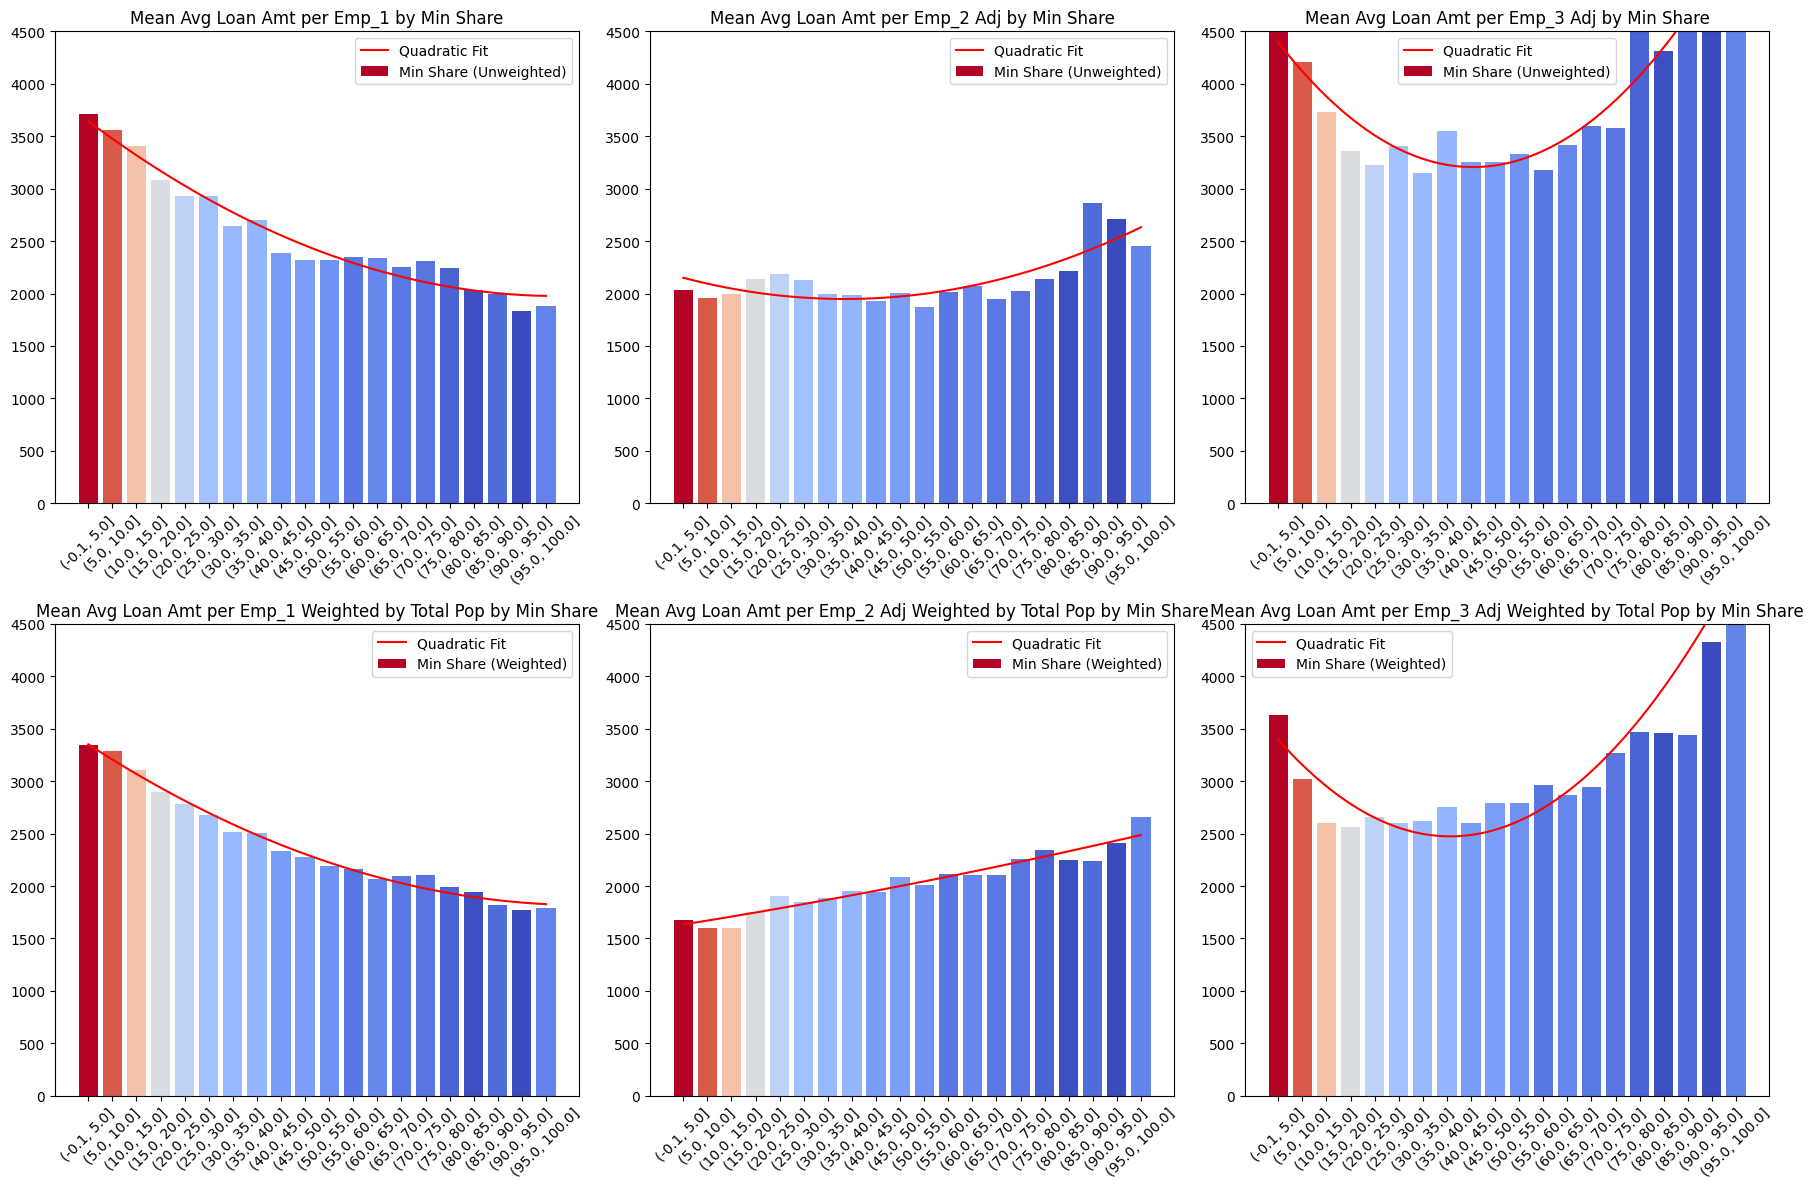

In [50]:
plot_multi_binned_means(stats_df, 'Min Share', ['Avg Loan Amt per Emp_1', 
              'Avg Loan Amt per Emp_2 Adj',
              'Avg Loan Amt per Emp_3 Adj'], 'Total Pop', "Rural", y_limits=[[0, 4500], [0, 4500]])

In [51]:
stats_df.columns

Index(['Min Share', 'Min Share Excl B', 'Black Share', 'White Share',
       'Asian Share', 'Hisp Share', 'Native Share', 'Rural', 'PC Inc', 'Gini',
       'UR', '%BachOrMore', 'W_Avg Emp Min Share', 'W_Avg Emp Black Share',
       'W_Avg Emp White Share', 'W_Avg Emp Asian Share',
       'W_Avg Emp Hisp Share', 'W_Avg Emp Non-Hisp Share',
       'W_Avg Emp Min Share', 'W_Avg Emp Min Share', 'Total Pop',
       'Loans per Emp Bus', 'Avg Loan Amt per Emp', 'Loans per Emp Bus_1',
       'Avg Loan Amt per Emp_1', 'Loans per Emp Bus_2',
       'Avg Loan Amt per Emp_2', 'Loans per Emp Bus_3',
       'Avg Loan Amt per Emp_3', 'Avg Loan Amt per Emp_2 Adj',
       'Avg Loan Amt per Emp_3 Adj', 'Census Region'],
      dtype='object')

In [52]:
stats_df.to_csv("Stats.csv")

In [53]:
data = [[0.000440, 0.000006, 0.000620, -0.000013, 0.001195, -0.000009],
        [-0.003080, 0.000014, 0.001546, -0.000004, 0.000742, 0.000005],
        [-0.013639, 0.000085, 0.006056, -0.000015, -0.000302, 0.000285],
        [-0.016280, 0.000106, 0.008222, -0.000032, 0.001635, 0.000280]]
polynomials = pd.DataFrame(data, columns = ["White Share", "White Share_2", "White Share x Rural_i", 
                                    "White Share_2 x Rural_i", "Black Share", "Black Share_2"], 
                           index = ["Tranche 1", "Tranche 2", "Tranche 3", 'All'])
polynomials["0"] = 0

In [54]:
polynomials

White Share  White Share_2  White Share x Rural_i  \
Tranche 1     0.000440       0.000006               0.000620   
Tranche 2    -0.003080       0.000014               0.001546   
Tranche 3    -0.013639       0.000085               0.006056   
All          -0.016280       0.000106               0.008222   

           White Share_2 x Rural_i  Black Share  Black Share_2  0  
Tranche 1                -0.000013     0.001195      -0.000009  0  
Tranche 2                -0.000004     0.000742       0.000005  0  
Tranche 3                -0.000015    -0.000302       0.000285  0  
All                      -0.000032     0.001635       0.000280  0

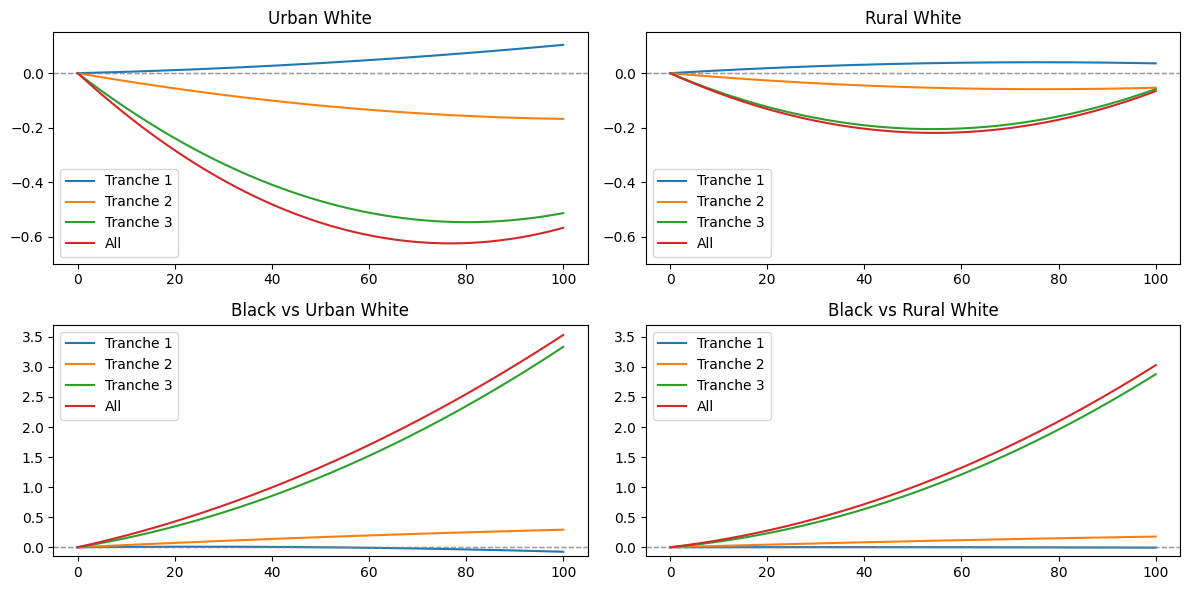

In [55]:
ylims = [[-0.7,0.15],[-0.15, 3.7]] 

def graph_poly(polynomials, ylims):
    fig, axs = plt.subplots(2, 2, figsize=(12, 6))

    # Flatten the axs array for easier iteration
    axs = axs.flatten()

    # Generate x values
    x = np.linspace(0, 100, 400)

    titles = ["Urban White","Rural White", "Black vs Urban White", "Black vs Rural White"]

    # Iterate over each subplot
    for idx, ax in enumerate(axs):
        # Iterate over each index in DataFrame
        for index in polynomials.index:
            # Calculate the coefficients based on idx
            if idx == 0:
                ylim = ylims[0]
                coeffs = polynomials.loc[index, ["White Share_2", "White Share", "0"]]
            elif idx == 1:
                ylim = ylims[0]
                coeffs_w = np.array(polynomials.loc[index, ["White Share_2", "White Share", "0"]])
                coeffs = coeffs_w + np.array(polynomials.loc[index, ["White Share_2 x Rural_i", "White Share x Rural_i", "0"]])
            elif idx == 2:
                ylim = ylims[1]
                coeffs_w = np.array(polynomials.loc[index, ["White Share_2", "White Share", "0"]])
                coeffs = np.array(polynomials.loc[index, ["Black Share_2", "Black Share", "0"]]) - coeffs_w
            elif idx == 3:
                ylim = ylims[1]
                coeffs_w = np.array(polynomials.loc[index, ["White Share_2", "White Share", "0"]]) + np.array(polynomials.loc[index, ["White Share_2 x Rural_i", "White Share x Rural_i", "0"]])
                coeffs = np.array(polynomials.loc[index, ["Black Share_2", "Black Share", "0"]]) - coeffs_w

            # Compute the polynomial values
            y = np.polyval(coeffs, x)

            # Plot the polynomial
            ax.plot(x, y, label=index)
            ax.axhline(0, color='gray', linewidth=1, linestyle='--', alpha = 0.3)

        # Add legend and title to each subplot
        ax.legend()
        ax.set_ylim(ylim)
        ax.set_title(titles[idx])

    # Adjust layout
    plt.tight_layout()

    # Show the plot
    plt.show()
graph_poly(polynomials, ylims)

In [56]:
data = [[-0.674, -25.221, -31.813, -57.708],
        [0.086, 0.121, 0.210, 0.417],
        [-0.020, 11.713, 5.100, 16.793], 
        [0.011, -0.081, -0.048, -0.117], 
        [-4.265, -13.143, -23.998, -41.405],
        [0.123, 0.161, 1.044, 1.328]]
data = np.array(data)
polynomials = pd.DataFrame(data.T, columns = ["White Share", "White Share_2", "White Share x Rural_i", 
                                    "White Share_2 x Rural_i", "Black Share", "Black Share_2"], 
                           index = ["Tranche 1", "Tranche 2", "Tranche 3", 'All'])
polynomials["0"] = 0
polynomials

White Share  White Share_2  White Share x Rural_i  \
Tranche 1       -0.674          0.086                 -0.020   
Tranche 2      -25.221          0.121                 11.713   
Tranche 3      -31.813          0.210                  5.100   
All            -57.708          0.417                 16.793   

           White Share_2 x Rural_i  Black Share  Black Share_2  0  
Tranche 1                    0.011       -4.265          0.123  0  
Tranche 2                   -0.081      -13.143          0.161  0  
Tranche 3                   -0.048      -23.998          1.044  0  
All                         -0.117      -41.405          1.328  0

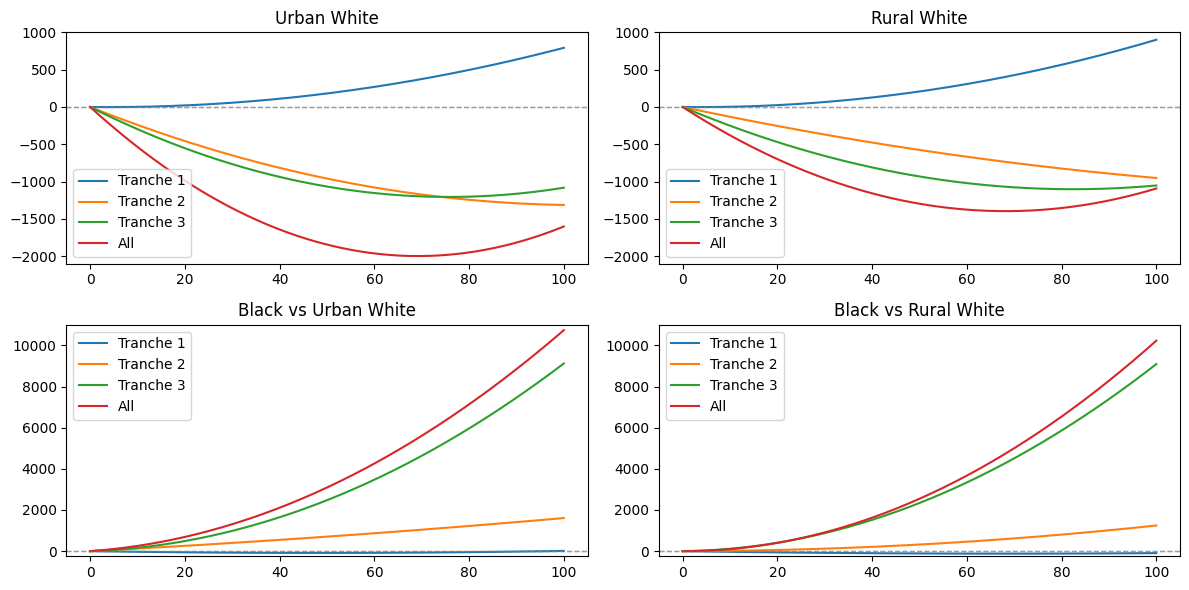

In [57]:
ylims = [[-2100,1000],[-250, 11000]]
graph_poly(polynomials, ylims)

In [58]:
OLS_data = [[0.000440, -0.003080, -0.013639, -0.016280],
            [0.000006, 0.000014, 0.000085, 0.000106],
            [0.000620, 0.001546, 0.006056, 0.008222],
            [-0.000013, -0.000004, -0.000015, -0.000032],
            [0.001195, 0.000742, -0.000302, 0.001635],
            [-0.000009, 0.000005, 0.000285, 0.000280]]


Tobit_data = [[0.000648, -0.002995, -0.013137, -0.015988],
            [0.000005, 0.000014, 0.000081, 0.000104],
            [0.000933, 0.001759, 0.006505, 0.008525],
            [-0.000015, -0.000006, -0.000018, -0.000034],
            [0.001285, 0.000859, -0.000318, 0.001637],
            [-0.000010, 0.000004, 0.000288, 0.000282]]


Hurdle_data = [[0.001186, -0.002357, -0.003840, -0.004261],
            [0.000000, 0.000015, 0.000011, 0.000020],
            [0.000458, 0.001749, 0.000401, 0.005146],
            [-0.000010, -0.000010, 0.000024, -0.000013],
            [0.001430, 0.002967, 0.009225, 0.012114],
            [-0.000008, -0.000020, -0.000002, 0.000009]]


In [59]:
OLS_data = np.array(OLS_data)
OLS_polynomials = pd.DataFrame(OLS_data.T, columns = ["White Share", "White Share_2", "White Share x Rural_i", 
                                    "White Share_2 x Rural_i", "Black Share", "Black Share_2"], 
                           index = ["Tranche 1", "Tranche 2", "Tranche 3", 'All'])
OLS_polynomials["0"] = 0
OLS_polynomials

White Share  White Share_2  White Share x Rural_i  \
Tranche 1     0.000440       0.000006               0.000620   
Tranche 2    -0.003080       0.000014               0.001546   
Tranche 3    -0.013639       0.000085               0.006056   
All          -0.016280       0.000106               0.008222   

           White Share_2 x Rural_i  Black Share  Black Share_2  0  
Tranche 1                -0.000013     0.001195      -0.000009  0  
Tranche 2                -0.000004     0.000742       0.000005  0  
Tranche 3                -0.000015    -0.000302       0.000285  0  
All                      -0.000032     0.001635       0.000280  0

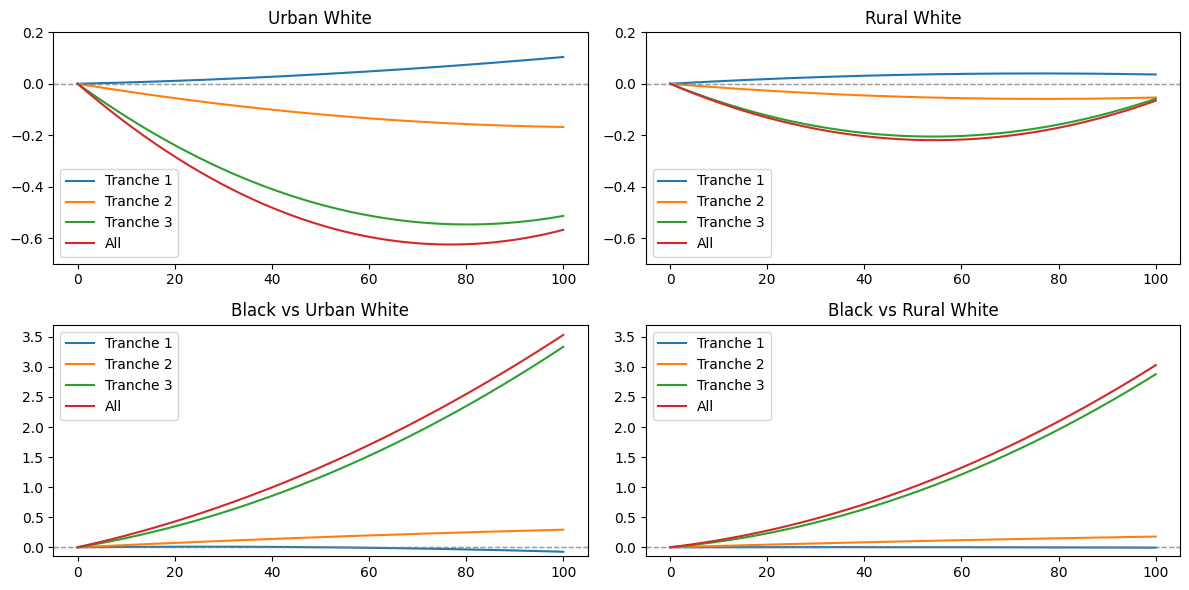

In [69]:
ylims = [[-0.7,0.2],[-0.15, 3.7]] 
graph_poly(OLS_polynomials, ylims)

In [60]:
Tobit_data = np.array(Tobit_data)
Tobit_polynomials = pd.DataFrame(Tobit_data.T, columns = ["White Share", "White Share_2", "White Share x Rural_i", 
                                    "White Share_2 x Rural_i", "Black Share", "Black Share_2"], 
                           index = ["Tranche 1", "Tranche 2", "Tranche 3", 'All'])
Tobit_polynomials["0"] = 0
Tobit_polynomials

White Share  White Share_2  White Share x Rural_i  \
Tranche 1     0.000648       0.000005               0.000933   
Tranche 2    -0.002995       0.000014               0.001759   
Tranche 3    -0.013137       0.000081               0.006505   
All          -0.015988       0.000104               0.008525   

           White Share_2 x Rural_i  Black Share  Black Share_2  0  
Tranche 1                -0.000015     0.001285      -0.000010  0  
Tranche 2                -0.000006     0.000859       0.000004  0  
Tranche 3                -0.000018    -0.000318       0.000288  0  
All                      -0.000034     0.001637       0.000282  0

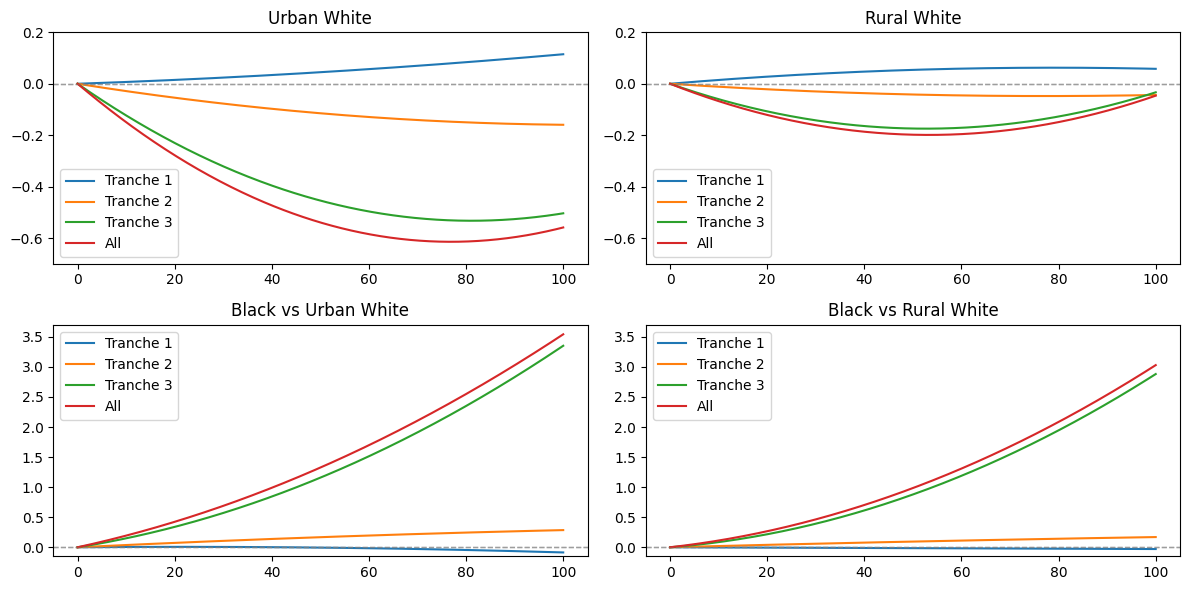

In [68]:
ylims = [[-0.7,0.2],[-0.15, 3.7]] 
graph_poly(Tobit_polynomials, ylims)

In [61]:
Hurdle_data = np.array(Hurdle_data)
Hurdle_polynomials = pd.DataFrame(Hurdle_data.T, columns = ["White Share", "White Share_2", "White Share x Rural_i", 
                                    "White Share_2 x Rural_i", "Black Share", "Black Share_2"], 
                           index = ["Tranche 1", "Tranche 2", "Tranche 3", 'All'])
Hurdle_polynomials["0"] = 0
Hurdle_polynomials

White Share  White Share_2  White Share x Rural_i  \
Tranche 1     0.001186       0.000000               0.000458   
Tranche 2    -0.002357       0.000015               0.001749   
Tranche 3    -0.003840       0.000011               0.000401   
All          -0.004261       0.000020               0.005146   

           White Share_2 x Rural_i  Black Share  Black Share_2  0  
Tranche 1                -0.000010     0.001430      -0.000008  0  
Tranche 2                -0.000010     0.002967      -0.000020  0  
Tranche 3                 0.000024     0.009225      -0.000002  0  
All                      -0.000013     0.012114       0.000009  0

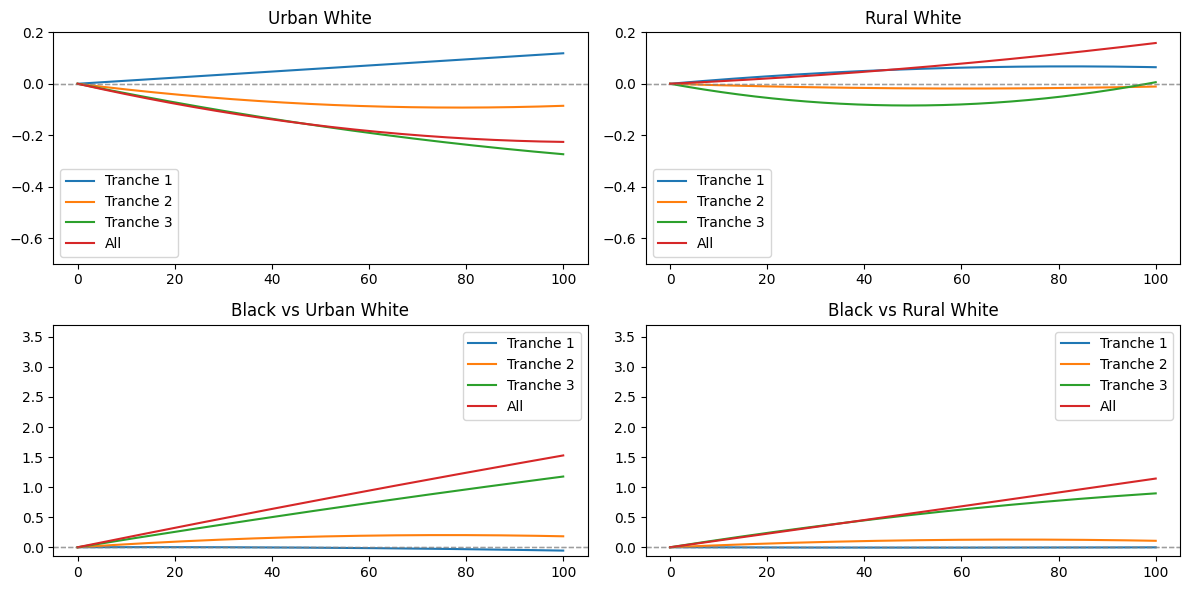

In [67]:
ylims = [[-0.7,0.2],[-0.15, 3.7]] 
graph_poly(Hurdle_polynomials, ylims)

In [70]:
OLS_data = [[-0.674, -25.221, -31.813, -57.708],
            [0.086, 0.121, 0.210, 0.417],
            [-0.020, 11.713, 5.100, 16.793], 
            [0.011, -0.081, -0.048, -0.117], 
            [-5.083, -11.406, -21.915, -38.404], 
            [0.098, 0.161, 1.025, 1.284]]

Tobit_data = [[8.475, -23.456, -26.558, -53.435],
            [0.018, 0.107, 0.163, 0.382],
            [10.505, 14.675, 8.223, 20.122],
            [-0.049, -0.102, -0.061, -0.136],
            [-2.799, -12.121, -24.365, -42.310],
            [0.138, 0.157, 1.073, 1.361]]

Hurdle_data = [[16.261, -25.880, -26.614, -41.378],
                [-0.012, 0.124, 0.170, 0.341],
                [2.960, 12.101, 12.593, 56.875],
                [-0.038, -0.032, -0.031, -0.378],
                [-9.799, -7.592, -0.135, -29.063],
                [0.186, 0.076, 0.470, 1.049]]

In [71]:
OLS_data = np.array(OLS_data)
OLS_polynomials = pd.DataFrame(OLS_data.T, columns = ["White Share", "White Share_2", "White Share x Rural_i", 
                                    "White Share_2 x Rural_i", "Black Share", "Black Share_2"], 
                           index = ["Tranche 1", "Tranche 2", "Tranche 3", 'All'])
OLS_polynomials["0"] = 0
OLS_polynomials

White Share  White Share_2  White Share x Rural_i  \
Tranche 1       -0.674          0.086                 -0.020   
Tranche 2      -25.221          0.121                 11.713   
Tranche 3      -31.813          0.210                  5.100   
All            -57.708          0.417                 16.793   

           White Share_2 x Rural_i  Black Share  Black Share_2  0  
Tranche 1                    0.011       -5.083          0.098  0  
Tranche 2                   -0.081      -11.406          0.161  0  
Tranche 3                   -0.048      -21.915          1.025  0  
All                         -0.117      -38.404          1.284  0

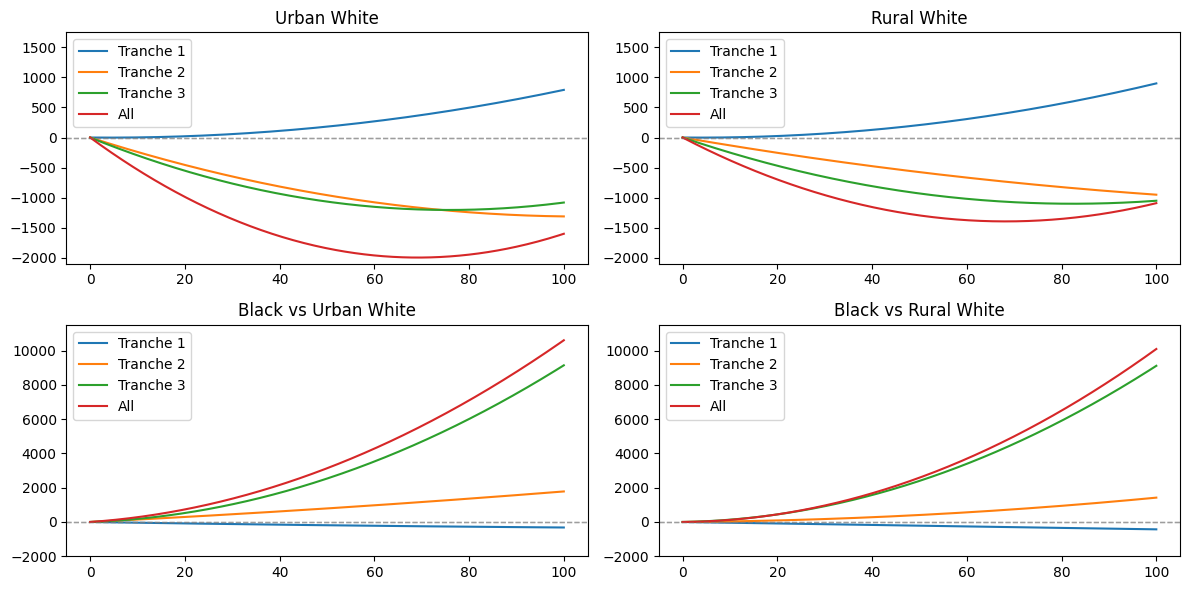

In [89]:
ylims = [[-2100,1750],[-2000, 11500]]
graph_poly(OLS_polynomials, ylims)

In [73]:
Tobit_data = np.array(Tobit_data)
Tobit_polynomials = pd.DataFrame(Tobit_data.T, columns = ["White Share", "White Share_2", "White Share x Rural_i", 
                                    "White Share_2 x Rural_i", "Black Share", "Black Share_2"], 
                           index = ["Tranche 1", "Tranche 2", "Tranche 3", 'All'])
Tobit_polynomials["0"] = 0
Tobit_polynomials

White Share  White Share_2  White Share x Rural_i  \
Tranche 1        8.475          0.018                 10.505   
Tranche 2      -23.456          0.107                 14.675   
Tranche 3      -26.558          0.163                  8.223   
All            -53.435          0.382                 20.122   

           White Share_2 x Rural_i  Black Share  Black Share_2  0  
Tranche 1                   -0.049       -2.799          0.138  0  
Tranche 2                   -0.102      -12.121          0.157  0  
Tranche 3                   -0.061      -24.365          1.073  0  
All                         -0.136      -42.310          1.361  0

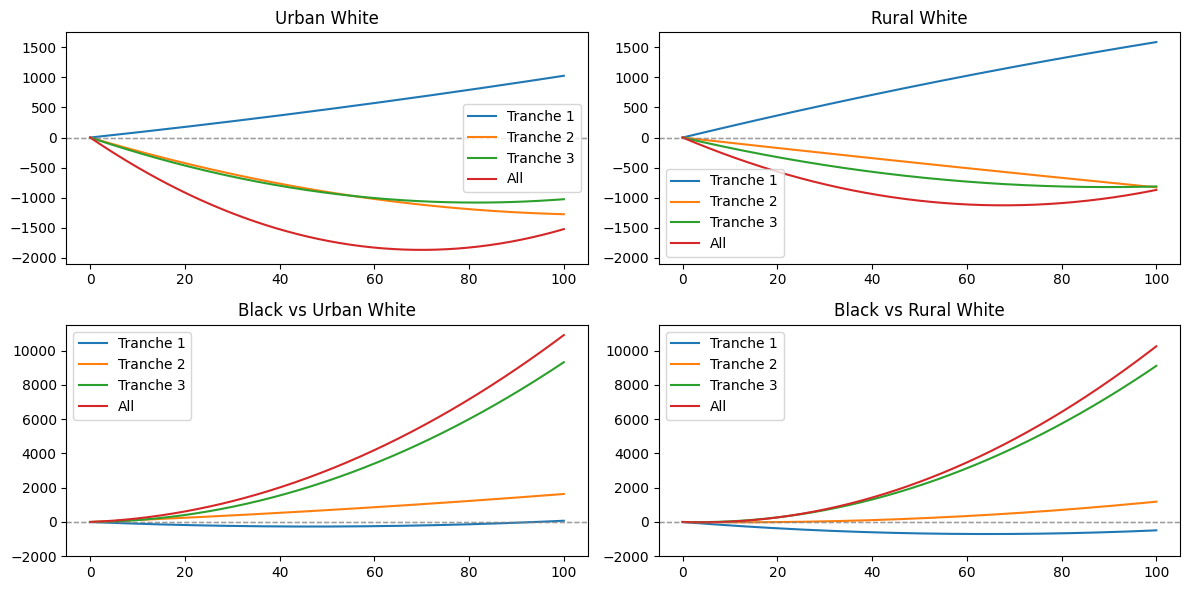

In [88]:
ylims = [[-2100,1750],[-2000, 11500]]
graph_poly(Tobit_polynomials, ylims)

In [75]:
Hurdle_data = np.array(Hurdle_data)
Hurdle_polynomials = pd.DataFrame(Hurdle_data.T, columns = ["White Share", "White Share_2", "White Share x Rural_i", 
                                    "White Share_2 x Rural_i", "Black Share", "Black Share_2"], 
                           index = ["Tranche 1", "Tranche 2", "Tranche 3", 'All'])
Hurdle_polynomials["0"] = 0
Hurdle_polynomials

White Share  White Share_2  White Share x Rural_i  \
Tranche 1       16.261         -0.012                  2.960   
Tranche 2      -25.880          0.124                 12.101   
Tranche 3      -26.614          0.170                 12.593   
All            -41.378          0.341                 56.875   

           White Share_2 x Rural_i  Black Share  Black Share_2  0  
Tranche 1                   -0.038       -9.799          0.186  0  
Tranche 2                   -0.032       -7.592          0.076  0  
Tranche 3                   -0.031       -0.135          0.470  0  
All                         -0.378      -29.063          1.049  0

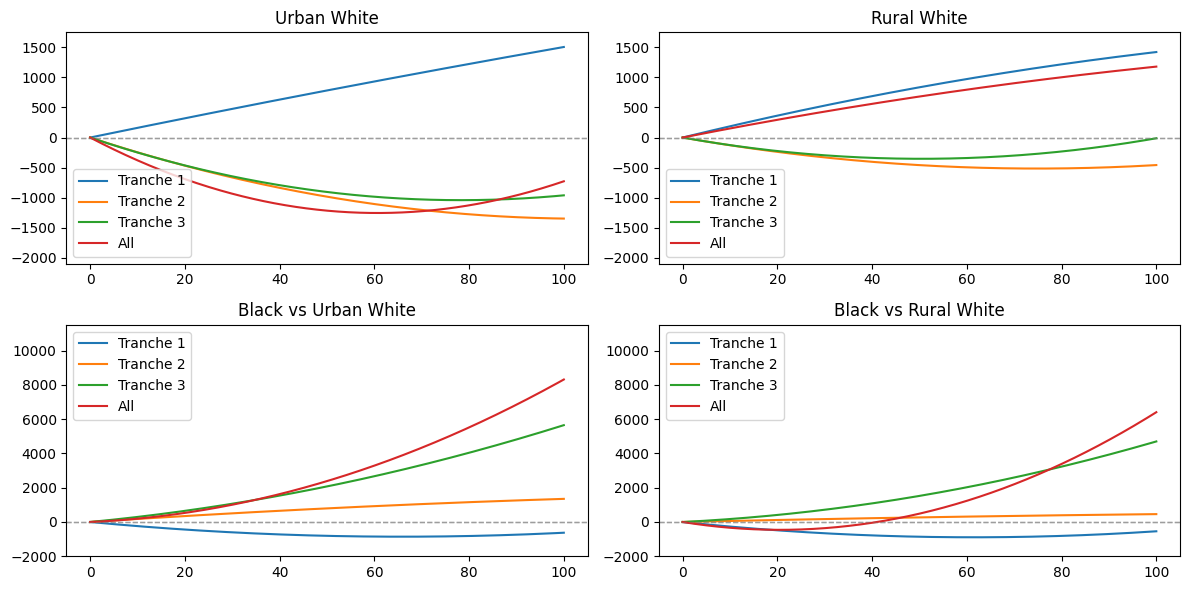

In [90]:
ylims = [[-2100,1750],[-2000, 11500]]
graph_poly(Hurdle_polynomials, ylims)